## Import all necessary libraries

In [1]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import pandas as pd
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

## Explore images and annotations

In [2]:
# Parse elements of annotation column into dicts
df_clips = pd.read_csv("dataset/clip/clip_csv.csv", sep = ',')
eval(df_clips['region_shape_attributes'][0])

# Check size of the image
img = Image.open("dataset/clip/1.jpg")
w, h = img.size
print(w, h)

{'name': 'rect', 'x': 193, 'y': 1, 'width': 40, 'height': 36}

## Reorganize dataset in YOLO format

In [47]:
object_counter = 1
categories = ['clip', 'wire', 'screw']
for cat in categories:
    cat_index = categories.index(cat)
    img_df = pd.read_csv(f"dataset/{cat}/{cat}_csv.csv", sep = ',')
    imgs = set(list(img_df['filename']))
    for example in imgs:
        img = Image.open(f"dataset/{cat}/{example}")
        w, h = img.size
        example_df = img_df[img_df['filename'] == example]
        label_file = open(f"img/labels/{object_counter}.txt", "w")
        for bbox in list(example_df['region_shape_attributes']):
            attr_dict = eval(bbox)
            x_center = int(attr_dict['x'] + attr_dict['width']/2)/w
            y_center = int(attr_dict['y'] + attr_dict['height']/2)/h
            bbox_width = attr_dict['width']/w
            bbox_height = attr_dict['height']/h
            label_file.write(
                f"{cat_index} {x_center} {y_center} {bbox_width} {bbox_height}\n"
            )
        label_file.close()
        img.save(f"img/images/{object_counter}.jpeg", "JPEG")
        object_counter += 1

## Train YOLOv5

In [4]:
!python3 yolov5/train.py --img 640 --batch 4 --epochs 50 \
  --data yolov5/data/railway.yaml --cfg yolov5s.yaml --weights yolov5s.pt \
  --name yolov5s_railway

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=yolov5/data/railway.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_railway, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-11-20 torch 1.10.0+cu102 CUDA:0 (GeForce MX150, 2003MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     10/49    0.858G   0.09453    0.0513   0.01604        76       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         68        469      0.721      0.163     0.0523     0.0104

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     11/49    0.858G   0.08912   0.04816   0.01541        53       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         68        469      0.768      0.166      0.135     0.0284

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     12/49    0.858G   0.09282   0.04836   0.01133        49       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         68        469      0.545      0.453      0.248     0.0637

     Epoch   gpu_mem       box      

## Inference on september and october images

In [3]:
!python3 yolov5/detect.py --weights weights/best.pt \
  --img 640 --conf 0.6 --source img/images/ --save-txt

detect: weights=['weights/best.pt'], source=img/images/, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-11-20 torch 1.10.0+cu102 CUDA:0 (GeForce MX150, 2003MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients
image 1/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/1.jpeg: 640x320 4 clips, Done. (0.024s)
image 2/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/10.jpeg: 640x320 4 clips, Done. (0.021s)
image 3/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/11.jpeg: 640x320 4 clips, Done. (0.021s)
image 4/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Ha

image 65/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/68.jpeg: 640x320 6 screws, Done. (0.024s)
image 66/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/7.jpeg: 640x320 4 clips, Done. (0.024s)
image 67/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/8.jpeg: 640x320 3 clips, Done. (0.021s)
image 68/68 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/images/9.jpeg: 640x320 4 clips, Done. (0.021s)
Speed: 0.8ms pre-process, 23.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp8
61 labels saved to yolov5/runs/detect/exp8/labels


## Testing detection on november images

In [6]:
!python3 yolov5/detect.py --weights weights/best.pt \
  --img 640 --conf 0.35 --source img/november_images/ --save-txt

detect: weights=['weights/best.pt'], source=img/november_images/, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-11-20 torch 1.10.0+cu102 CUDA:0 (GeForce MX150, 2003MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients
image 1/4 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/november_images/12702_1_857_520.jpg: 640x352 5 clips, Done. (0.033s)
image 2/4 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/november_images/20303_1_104_79.jpg: 640x320 10 screws, Done. (0.023s)
image 3/4 /home/nick/py-progs/portfolio/Competitions/Volga Iron Hack/img/november_images/20303_1_104_81.jpg: 640x320 5 screws, Done. (0.0

## Function for demonstrating the results of detection

In [12]:
def load_image(img_path: Path, resize=True):
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 256), interpolation = cv2.INTER_AREA)
    return img
def show_grid(image_paths):
    images = [load_image(img) for img in image_paths]
    images = torch.as_tensor(images)
    images = images.permute(0, 3, 1, 2)
    grid_img = torchvision.utils.make_grid(images, nrow=11)
    plt.figure(figsize=(24, 12))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off')

## September and october images after scoring

<ipython-input-8-e804bcb5374a>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  images = torch.as_tensor(images)
<ipython-input-8-e804bcb5374a>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(24, 12))


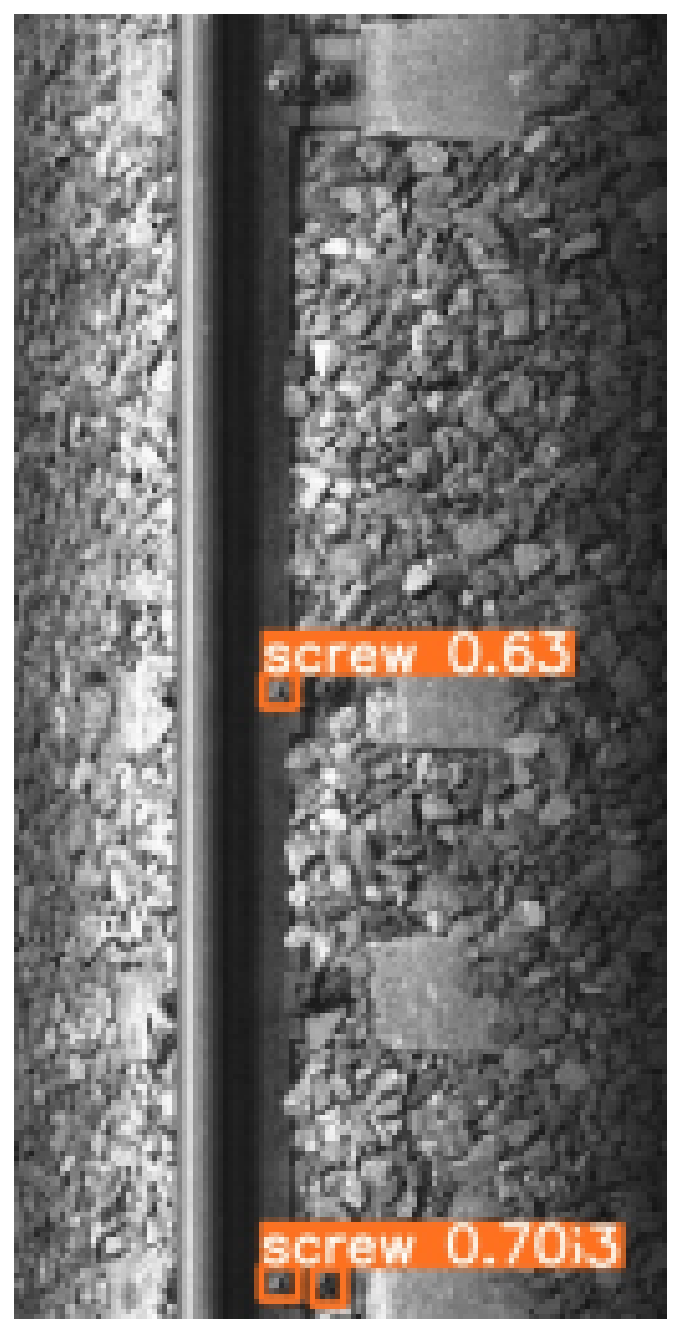

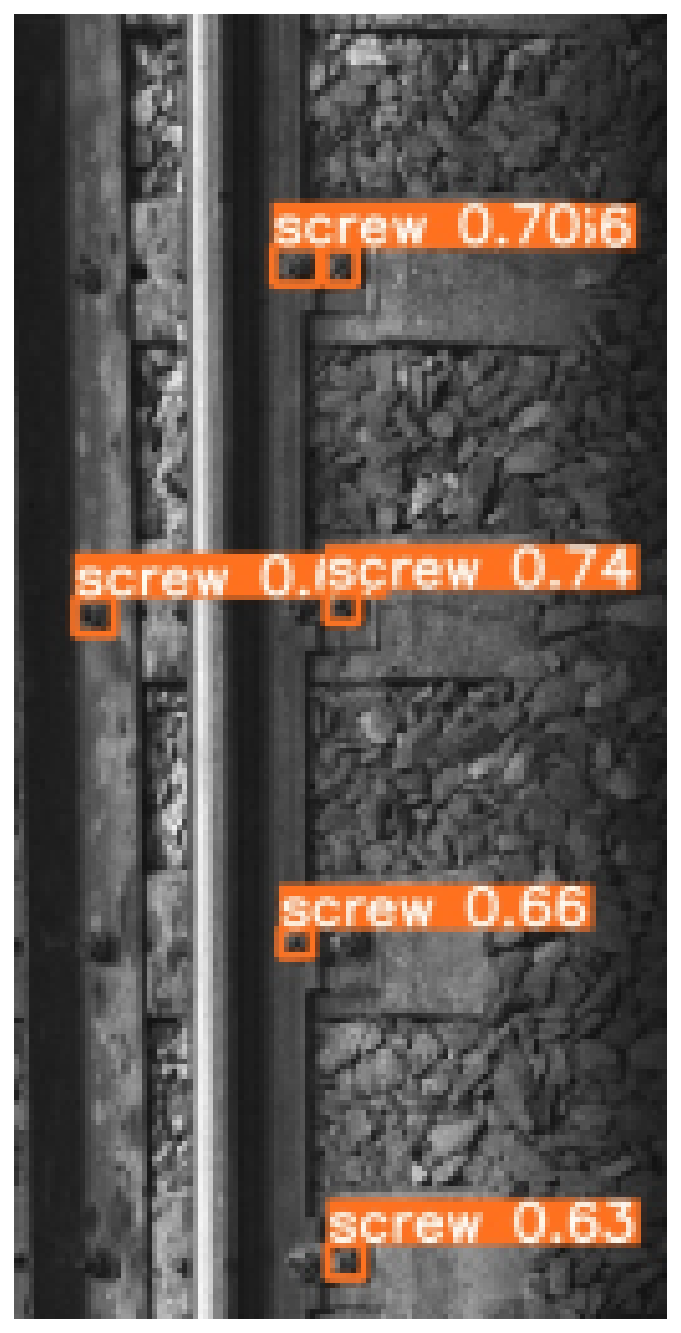

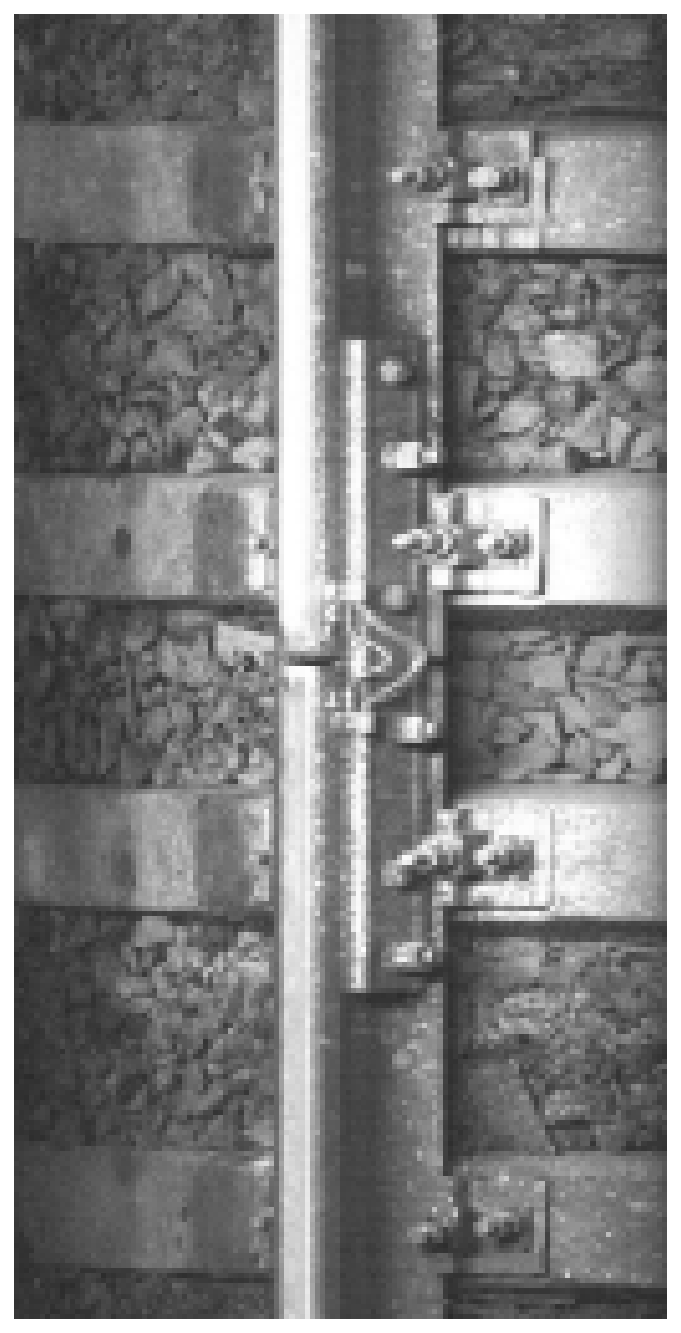

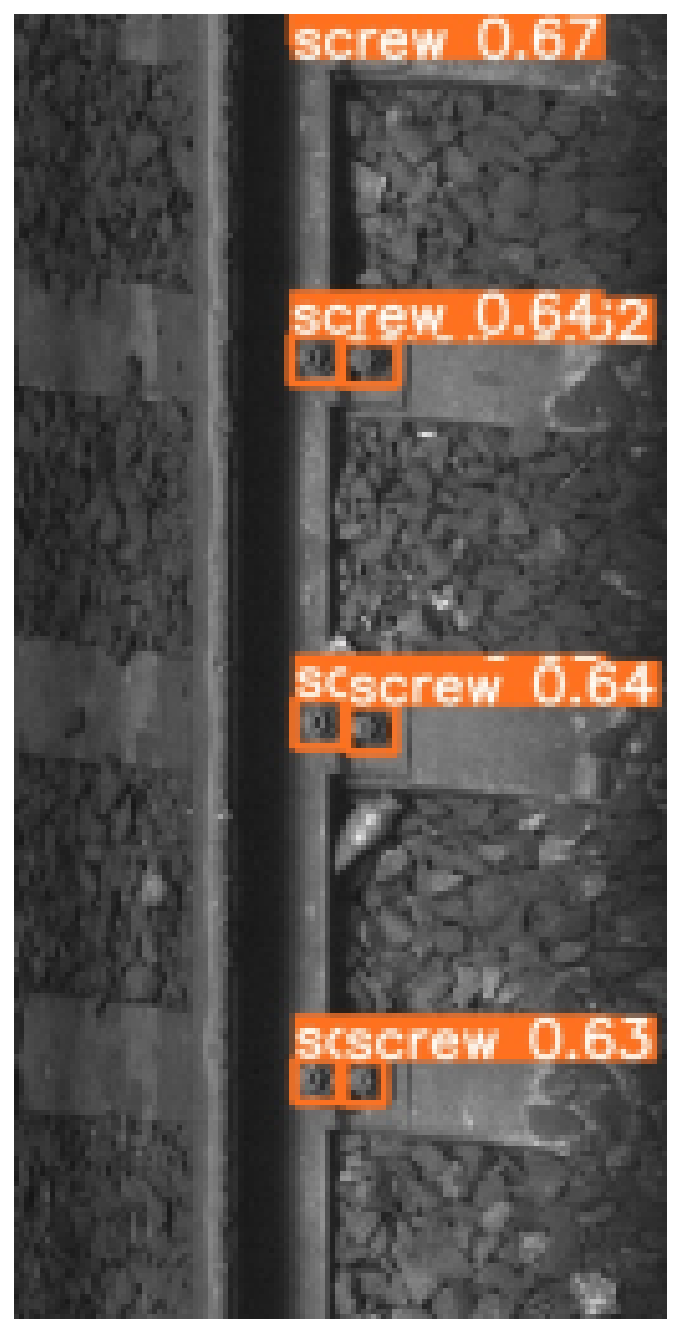

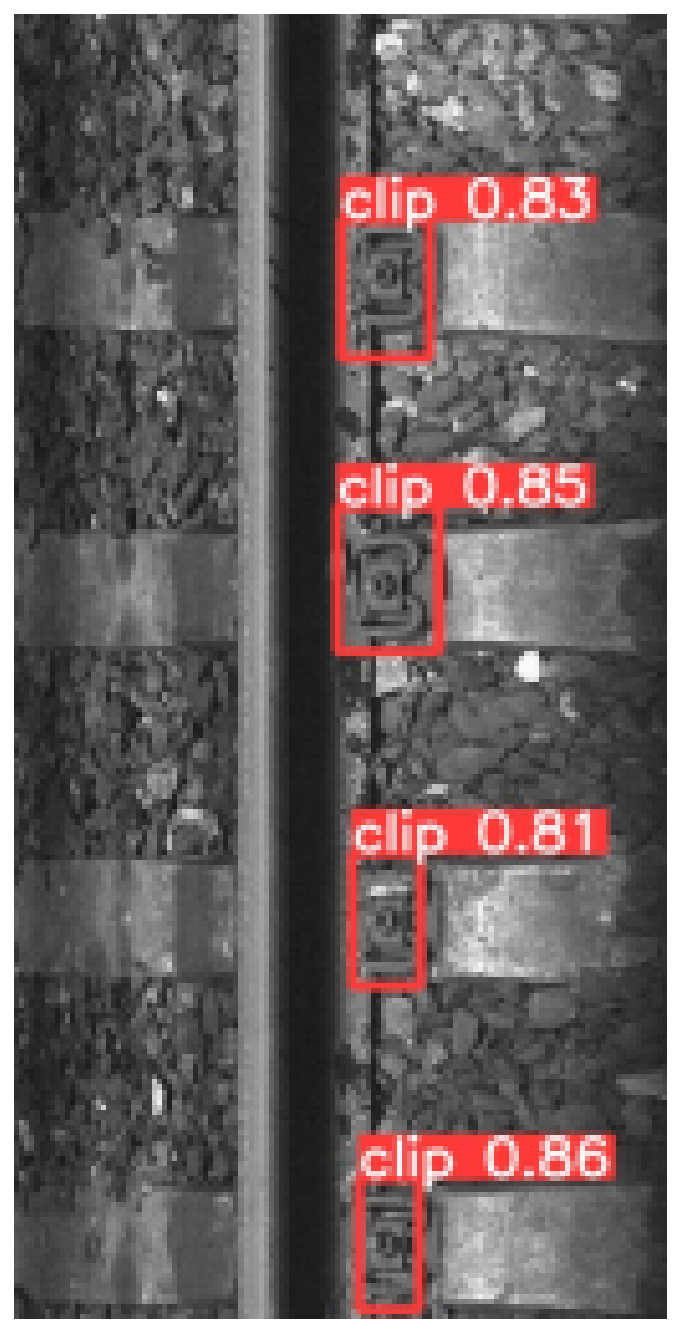

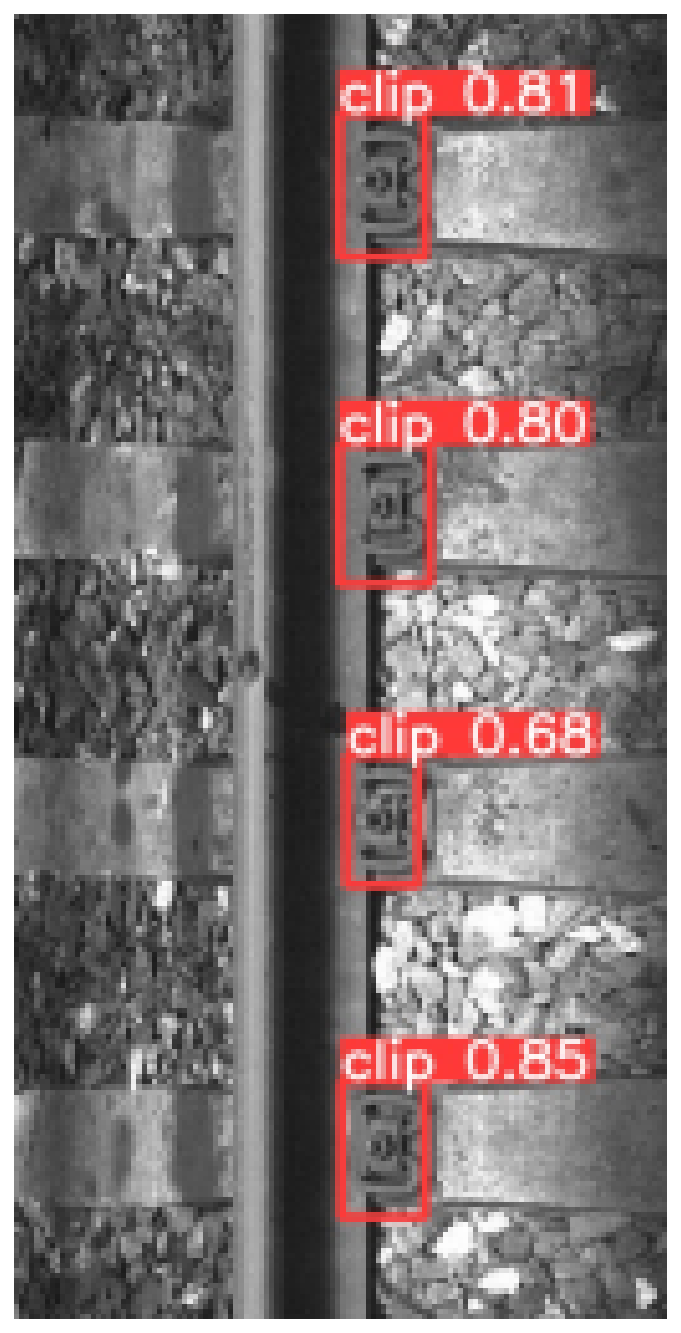

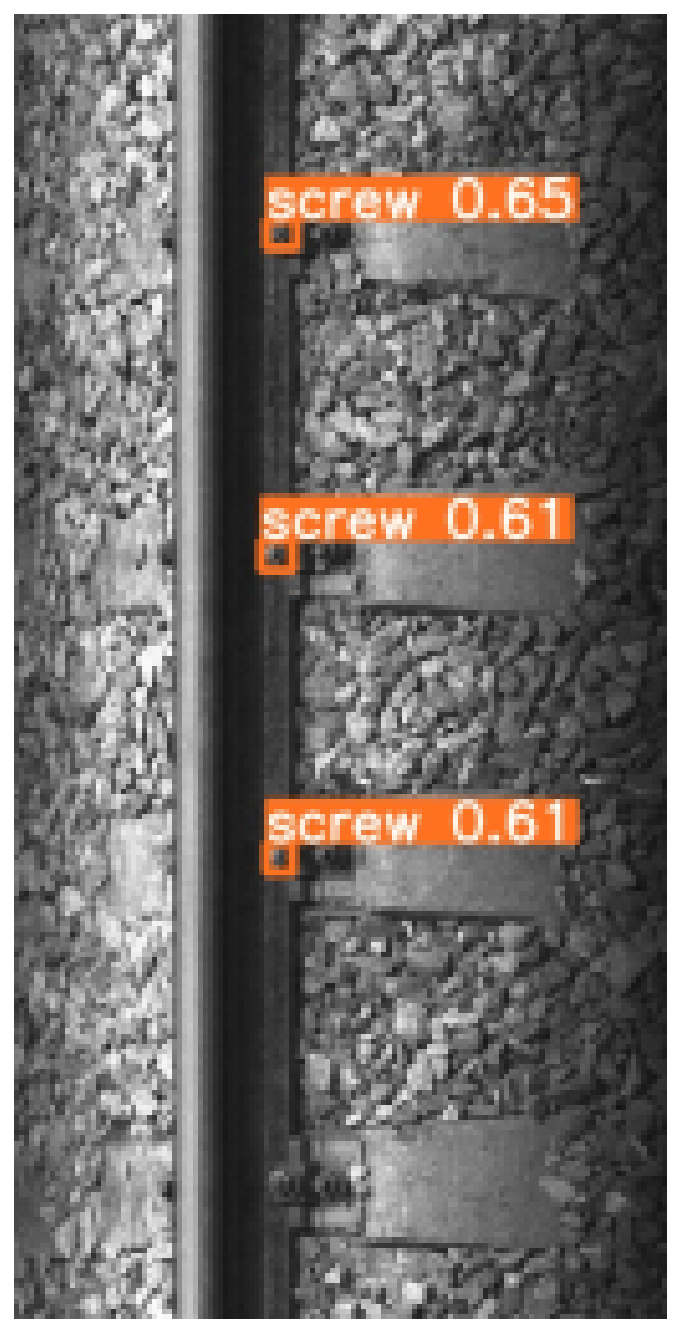

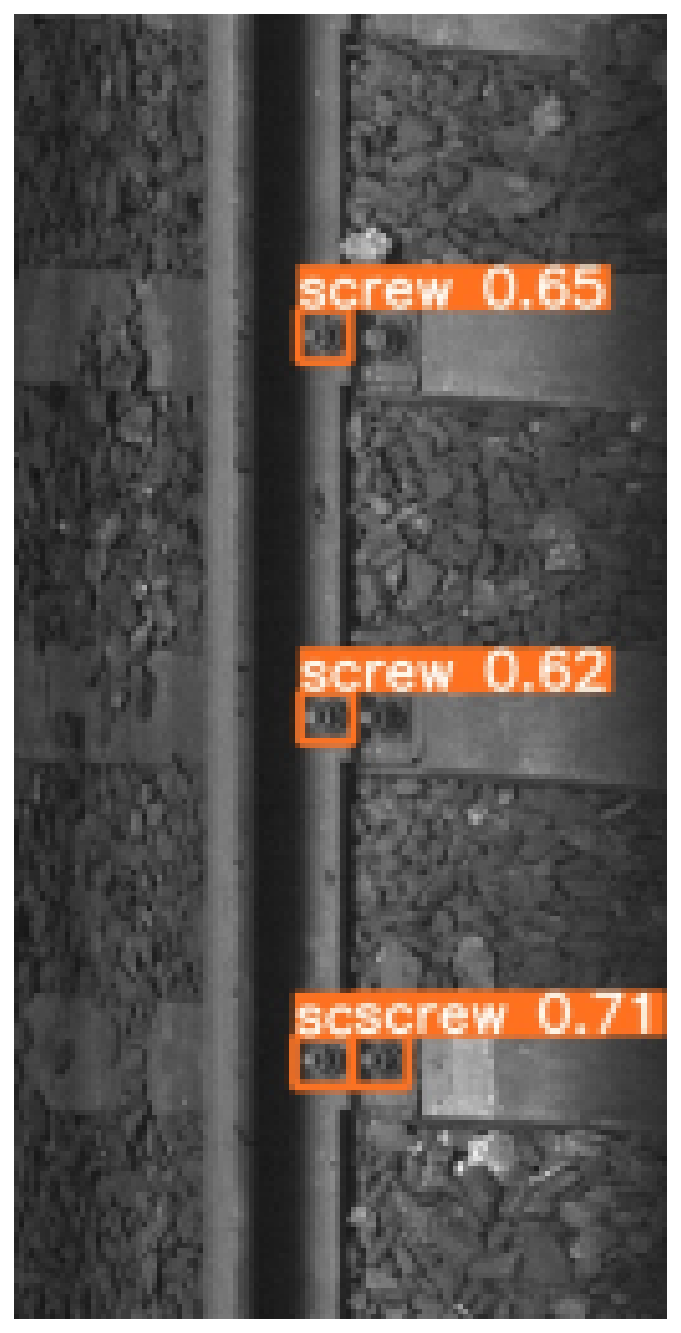

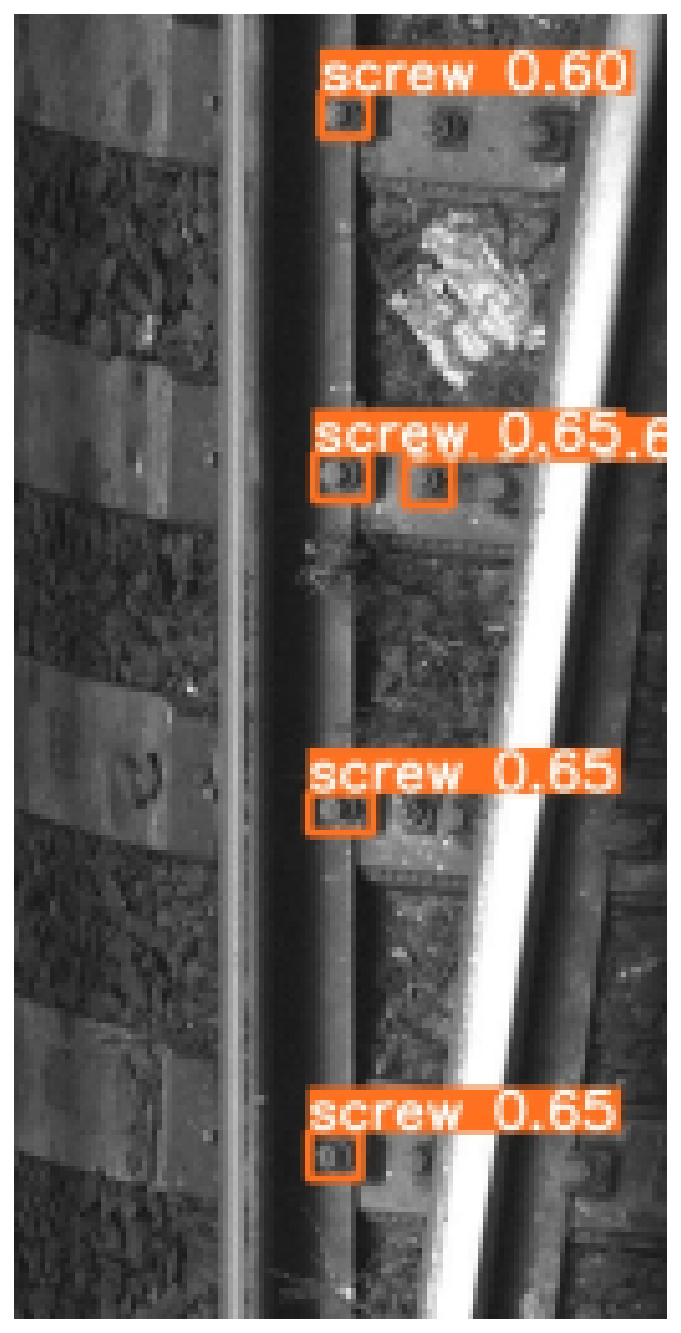

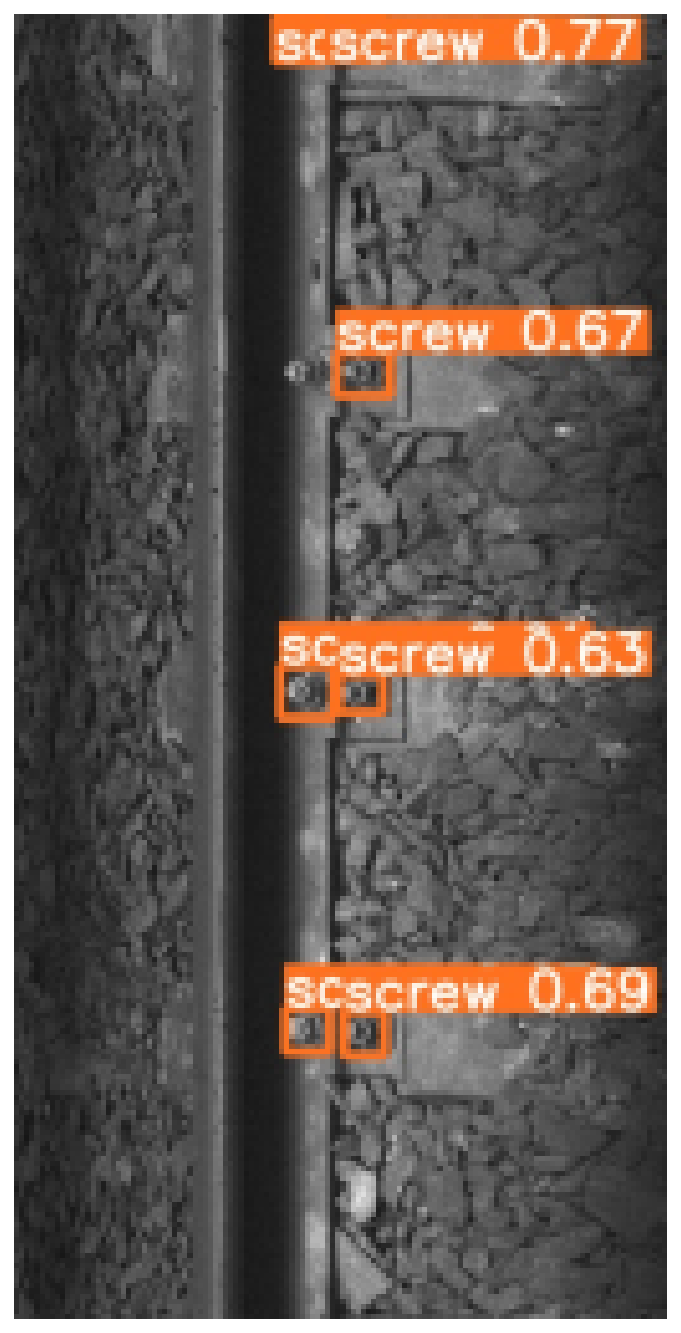

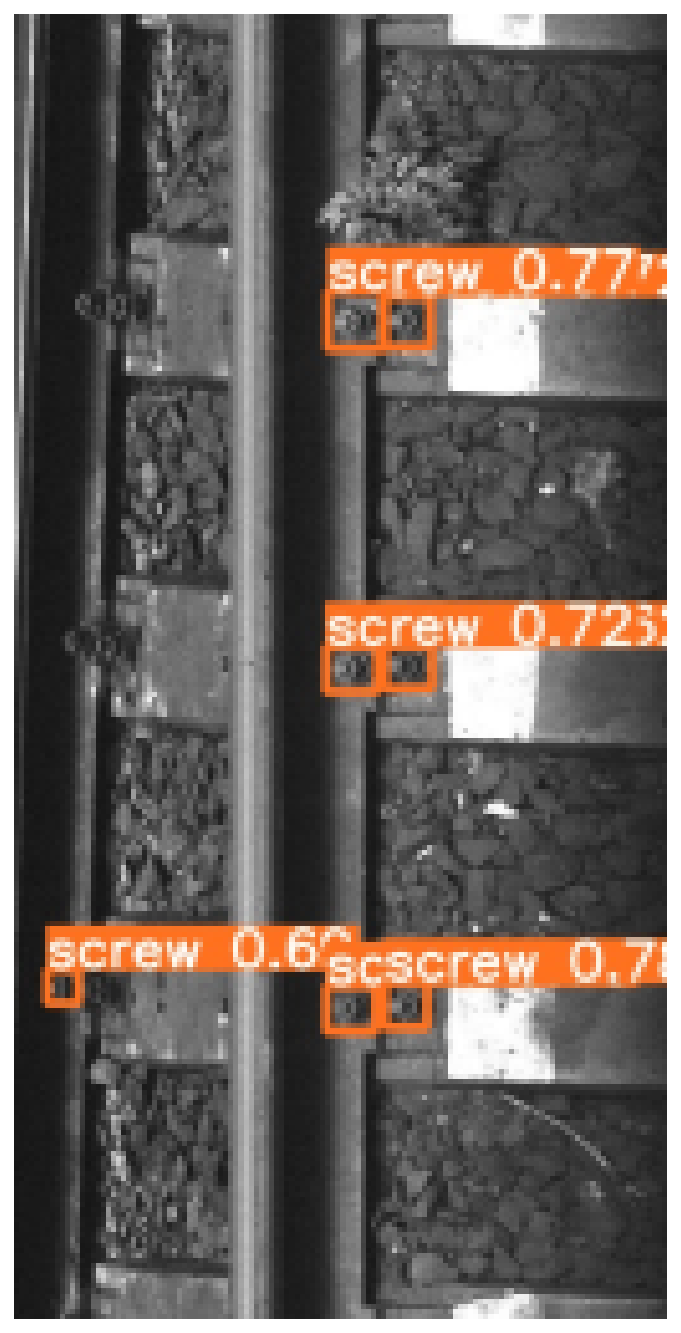

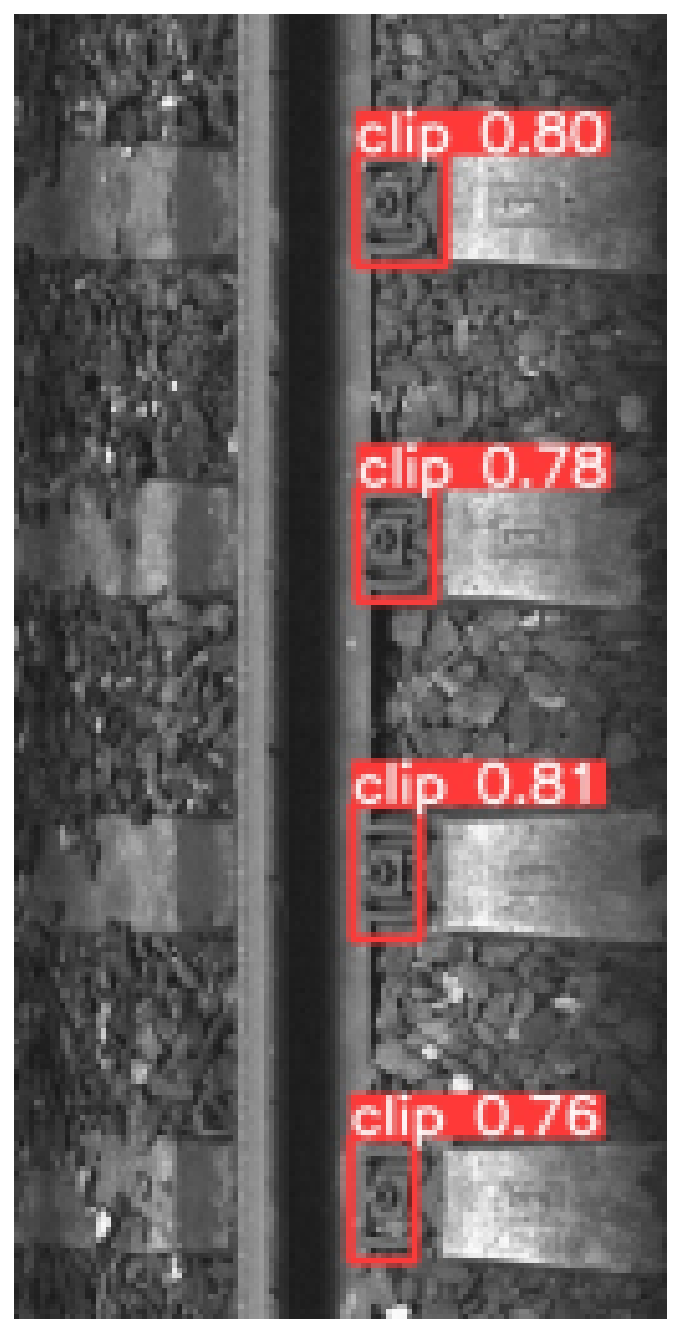

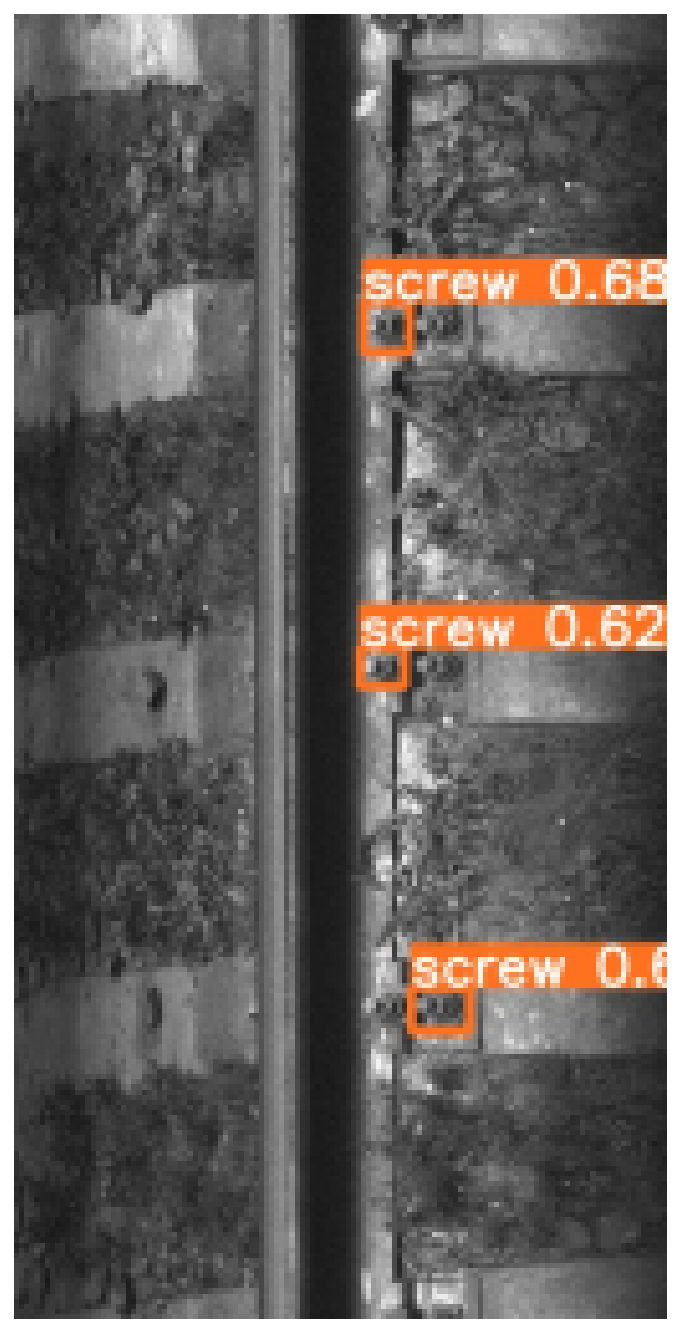

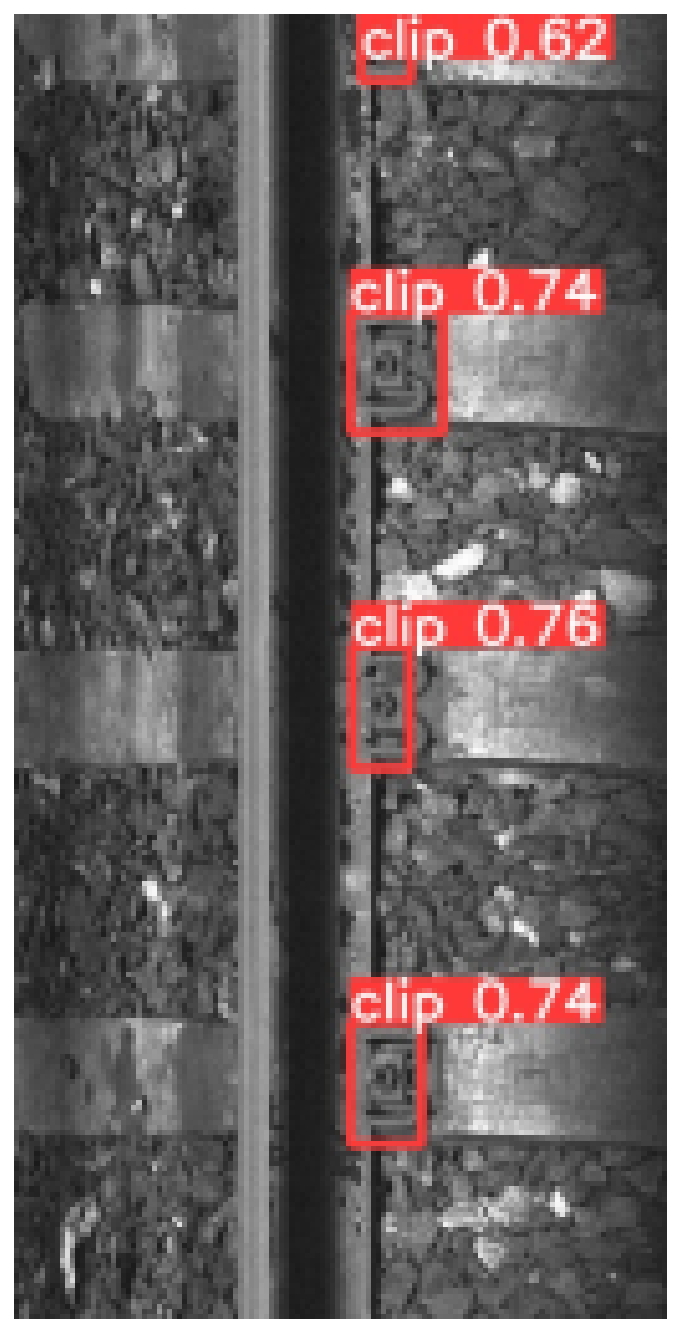

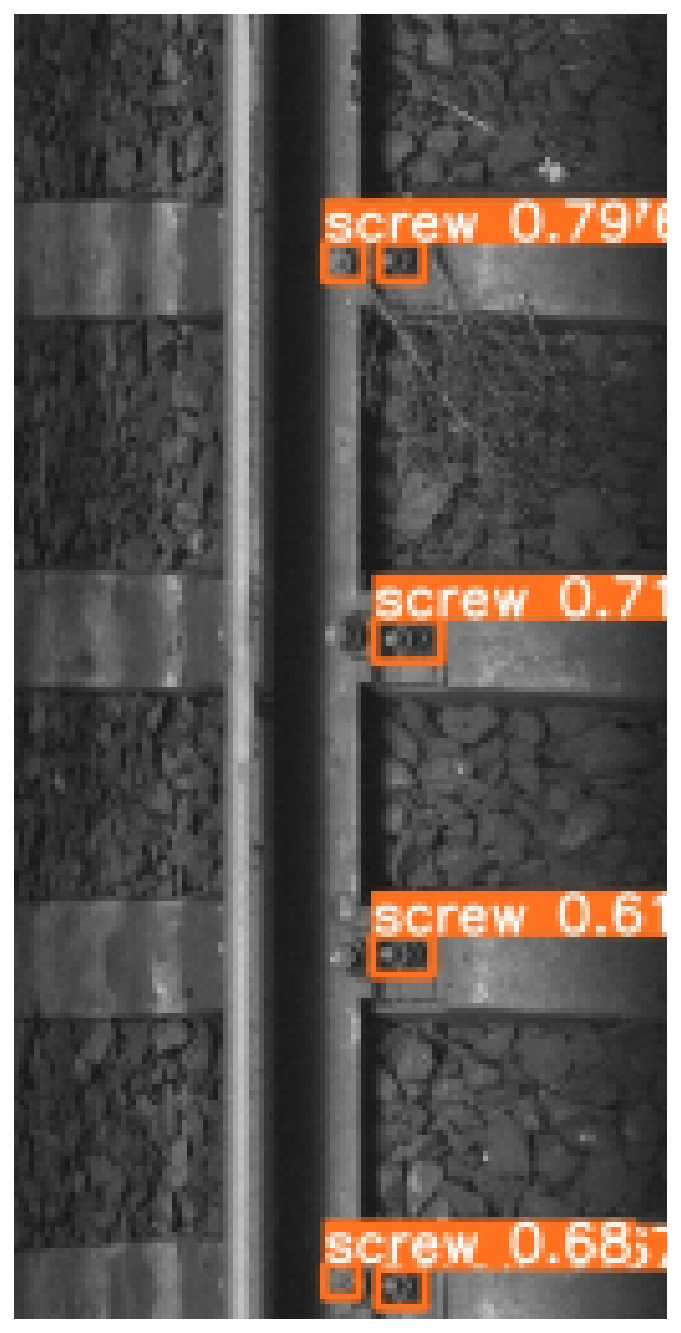

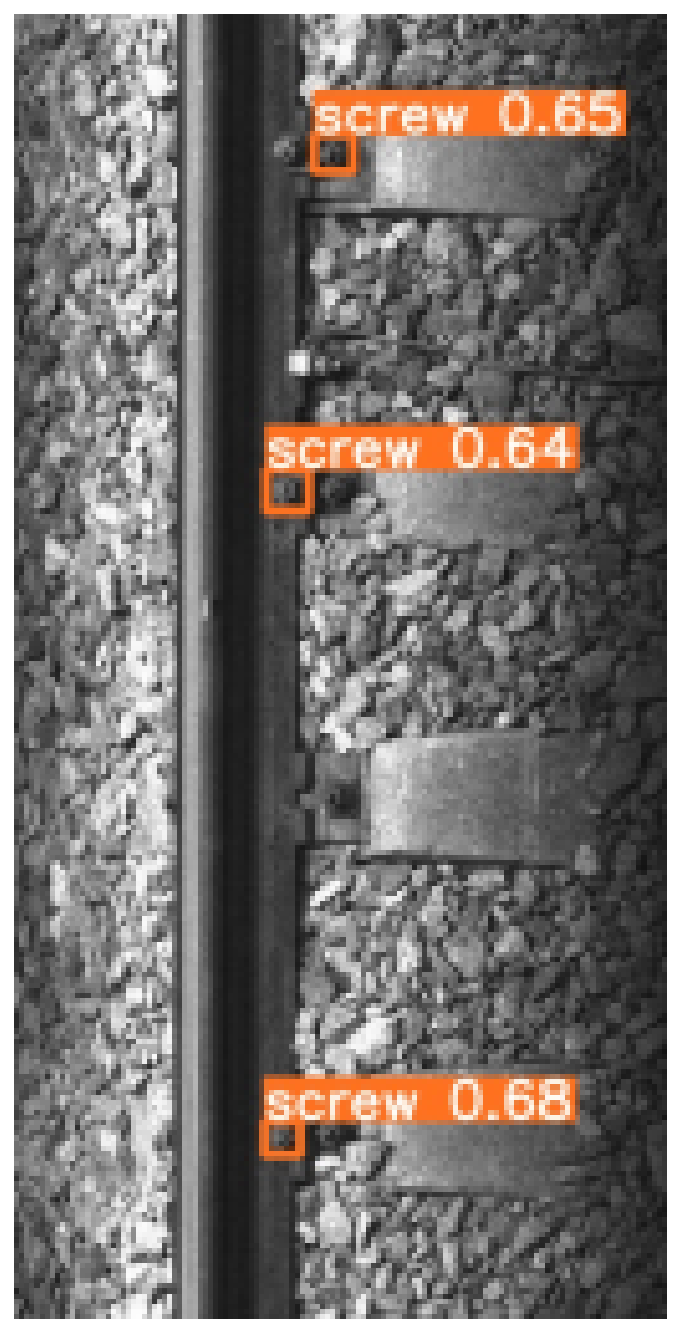

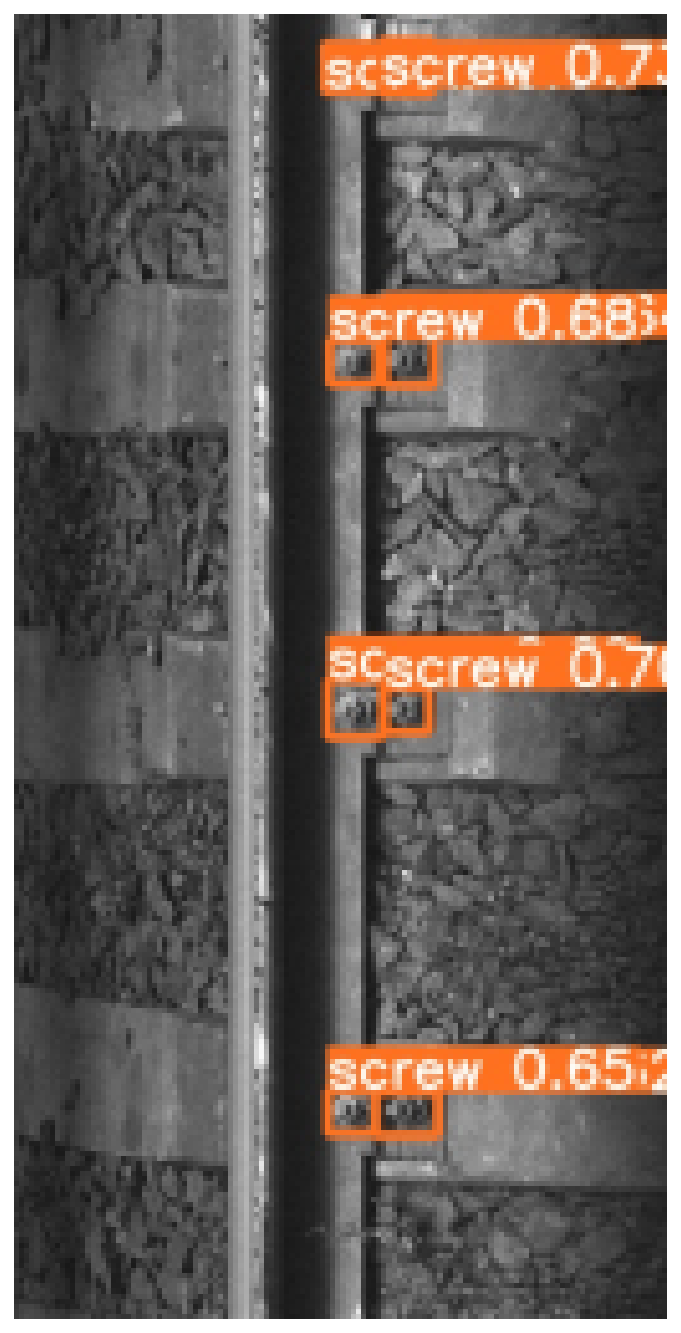

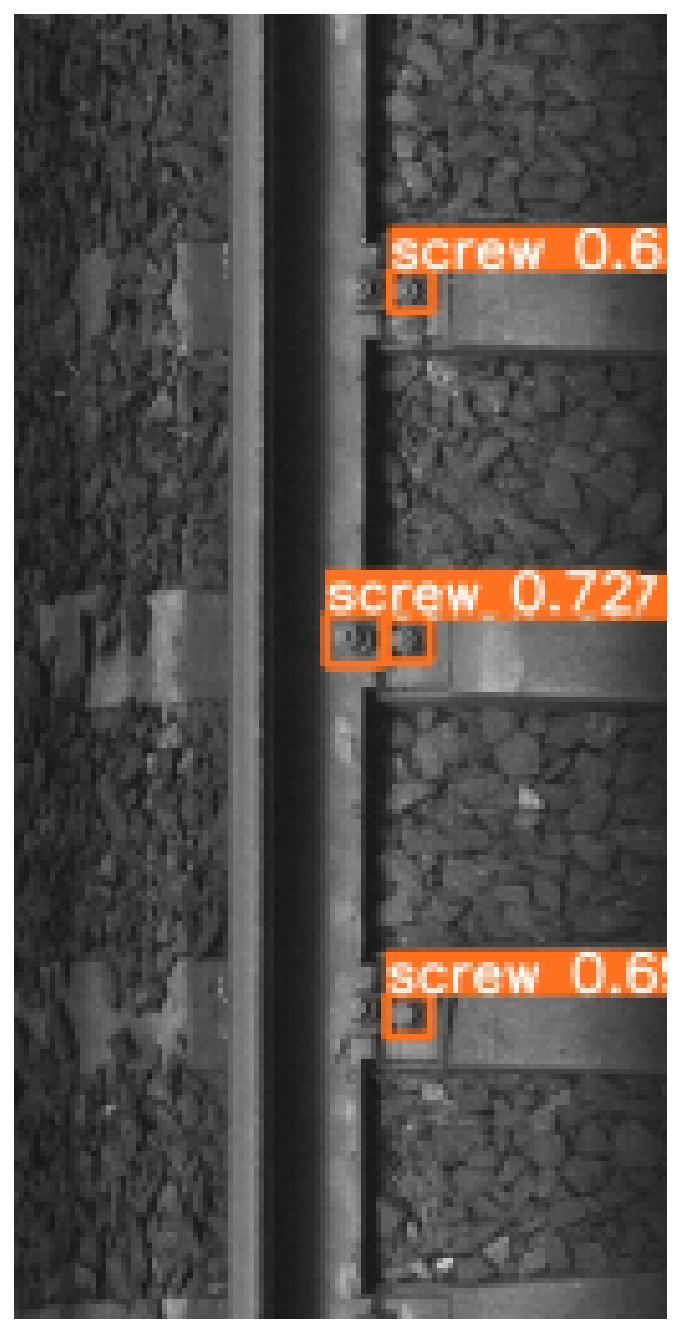

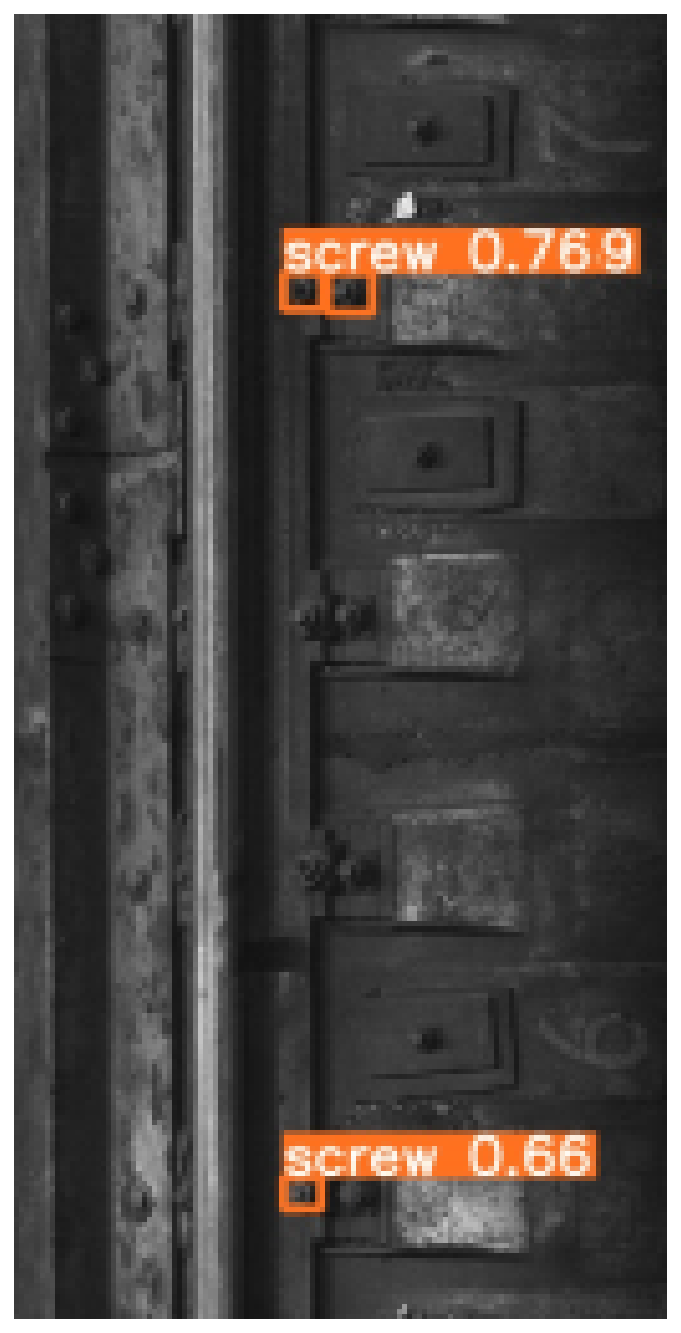

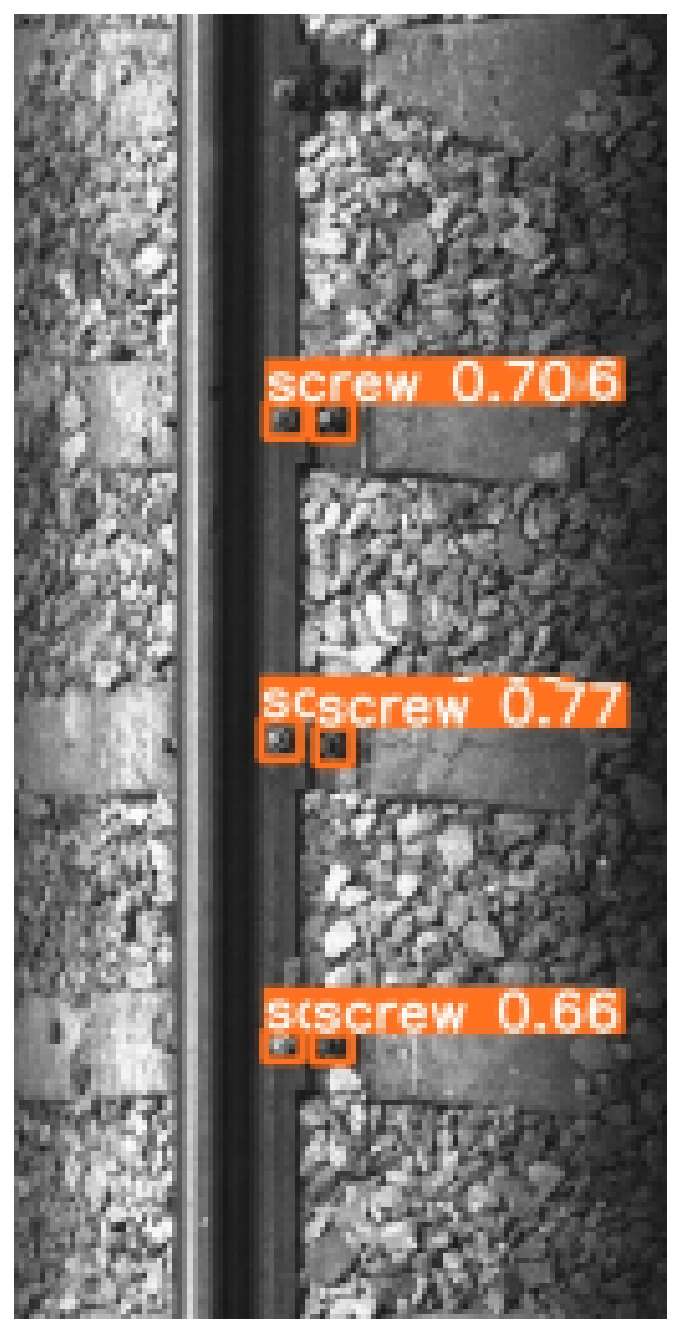

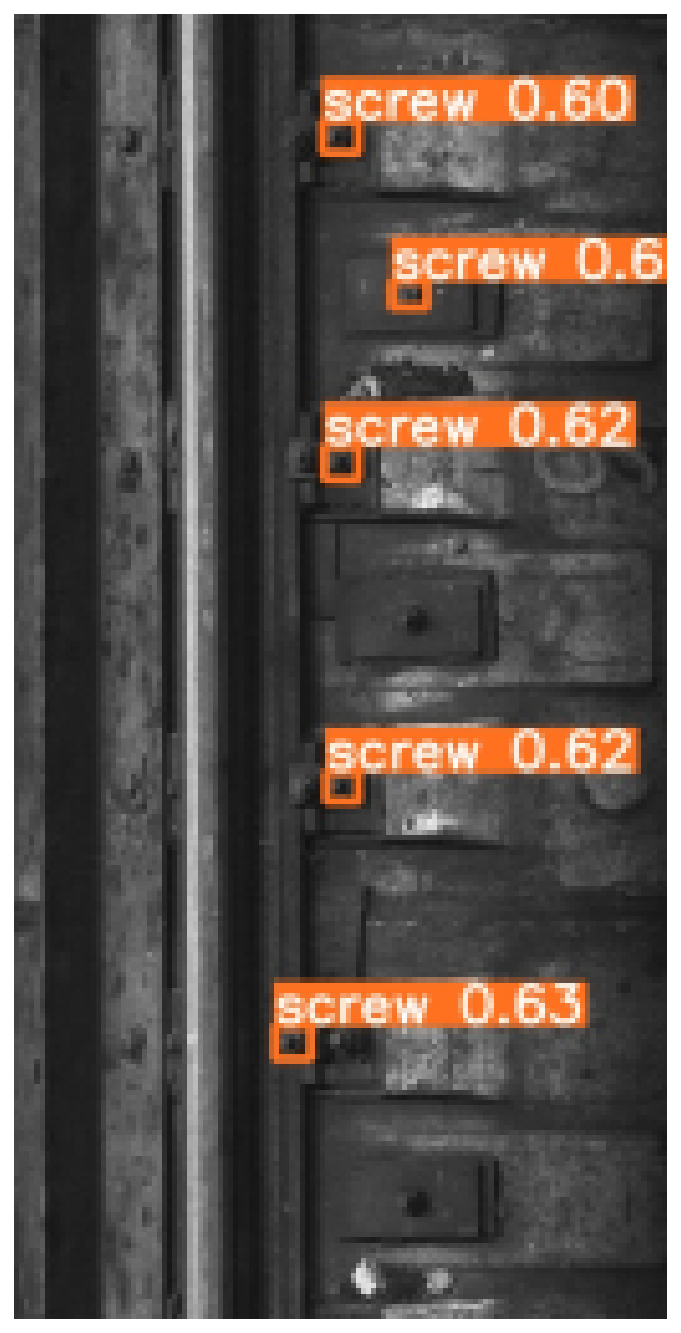

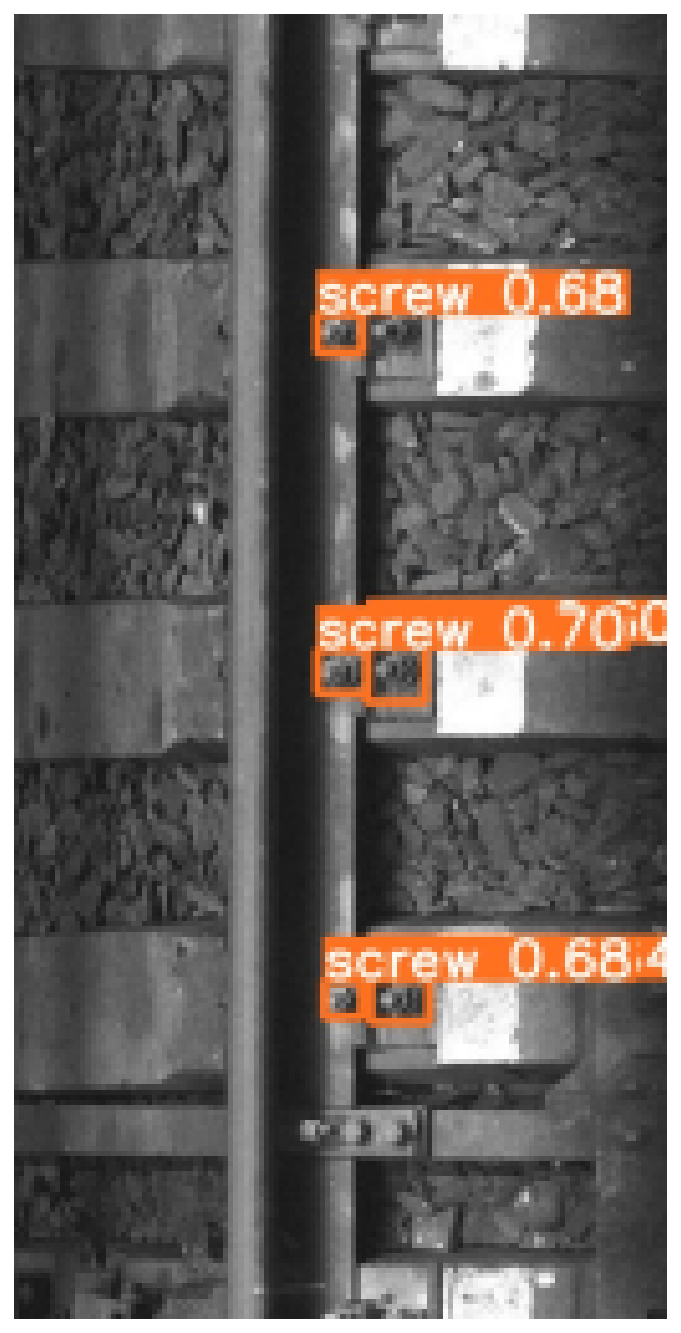

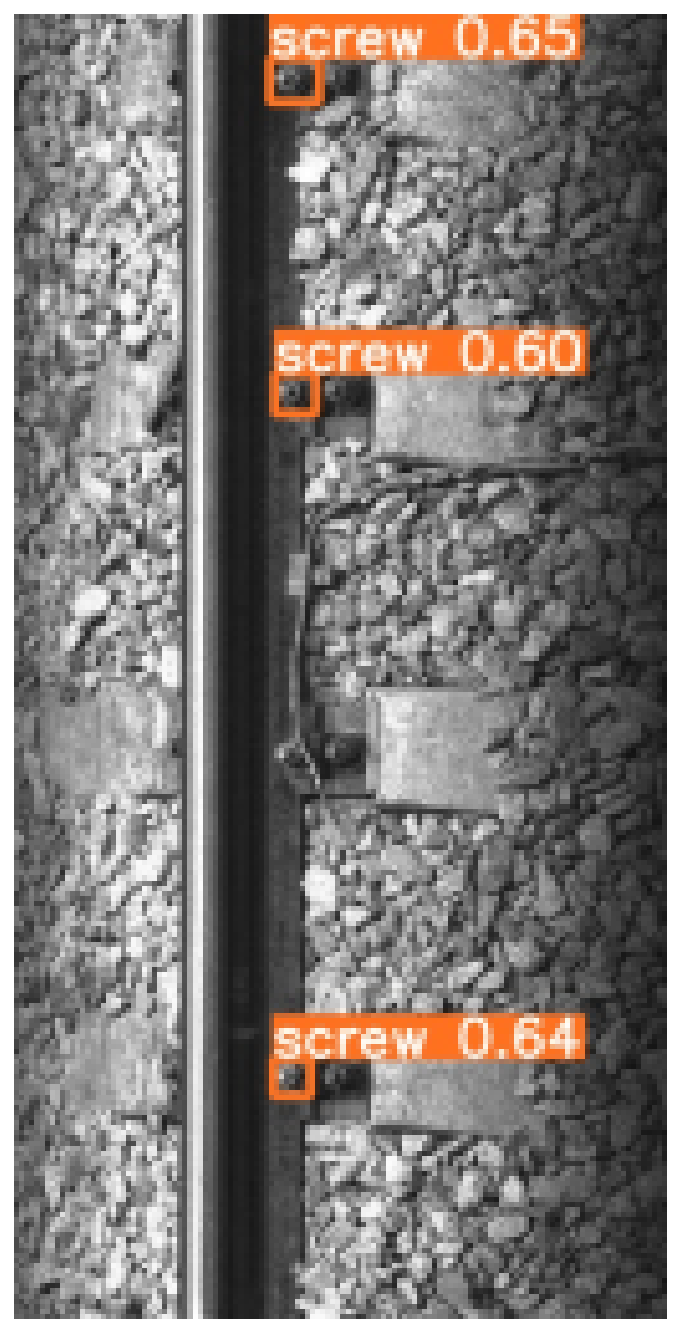

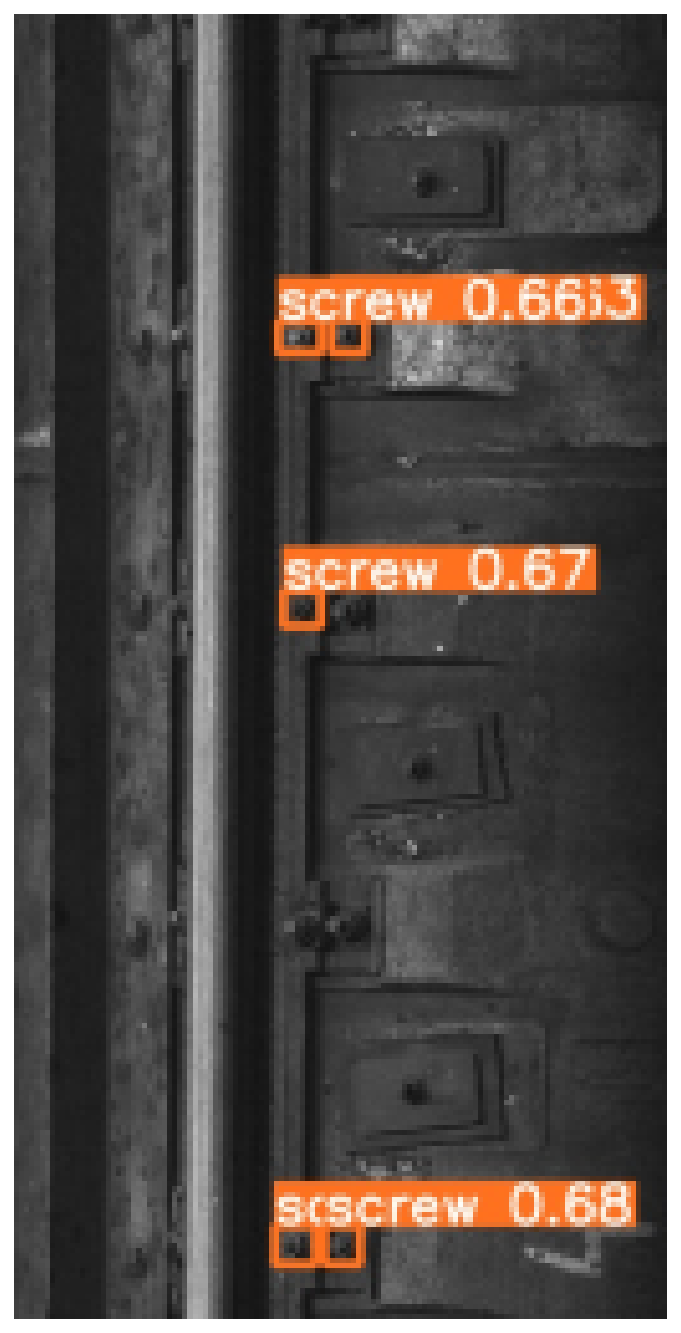

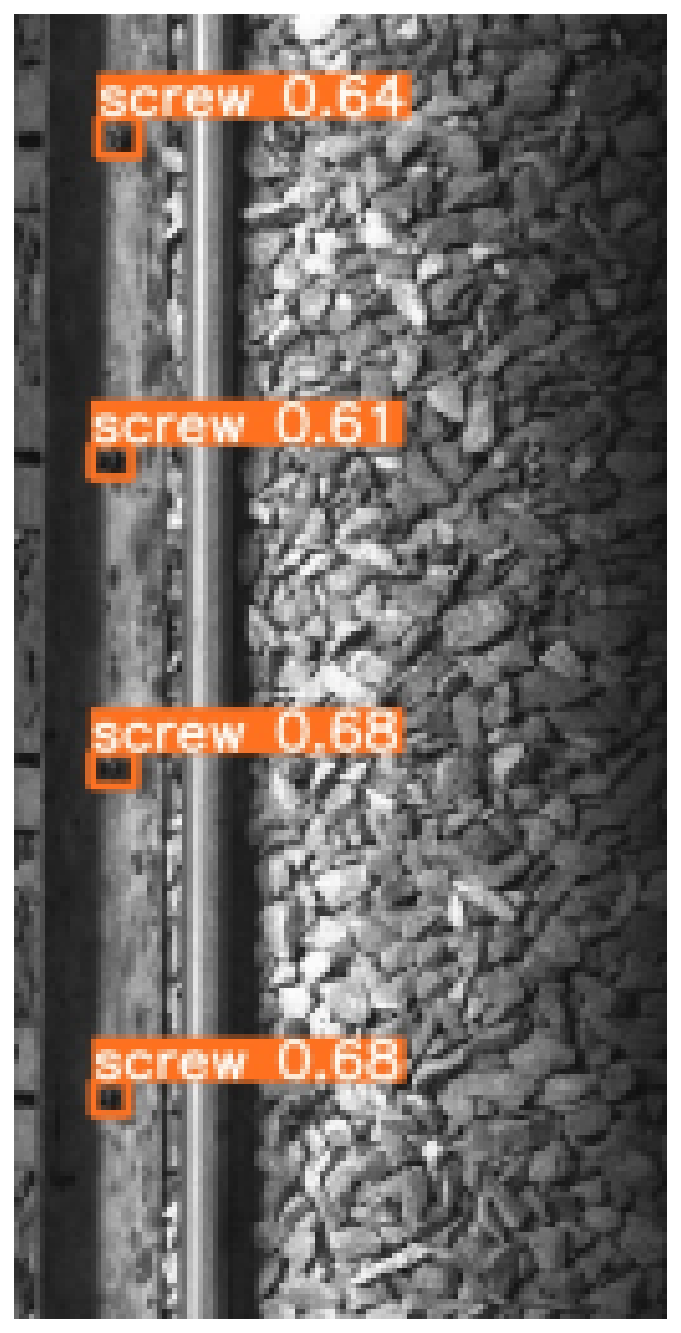

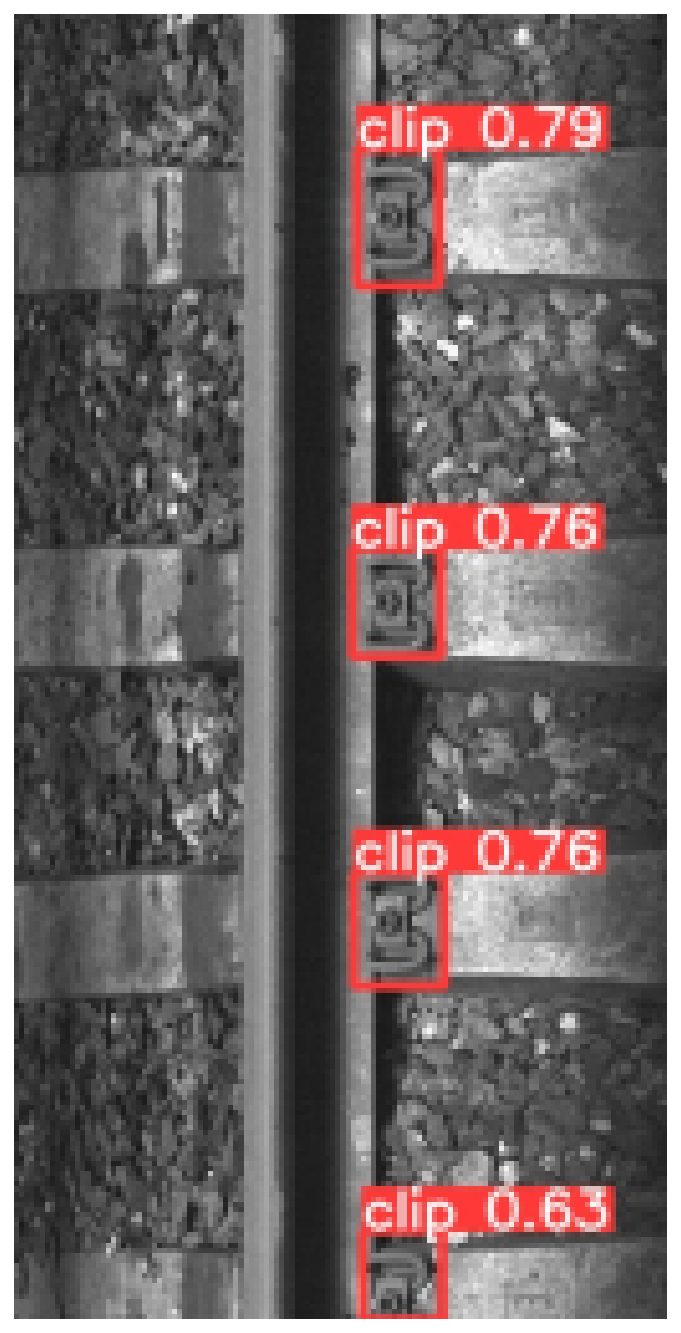

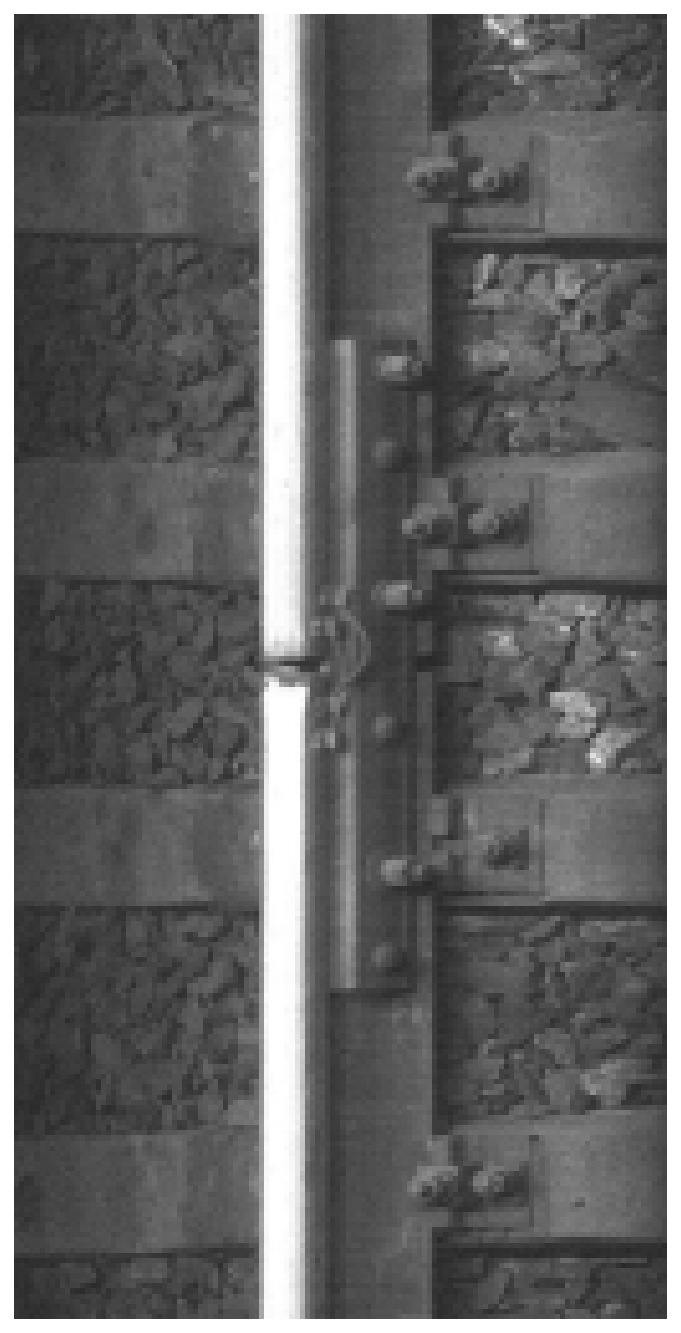

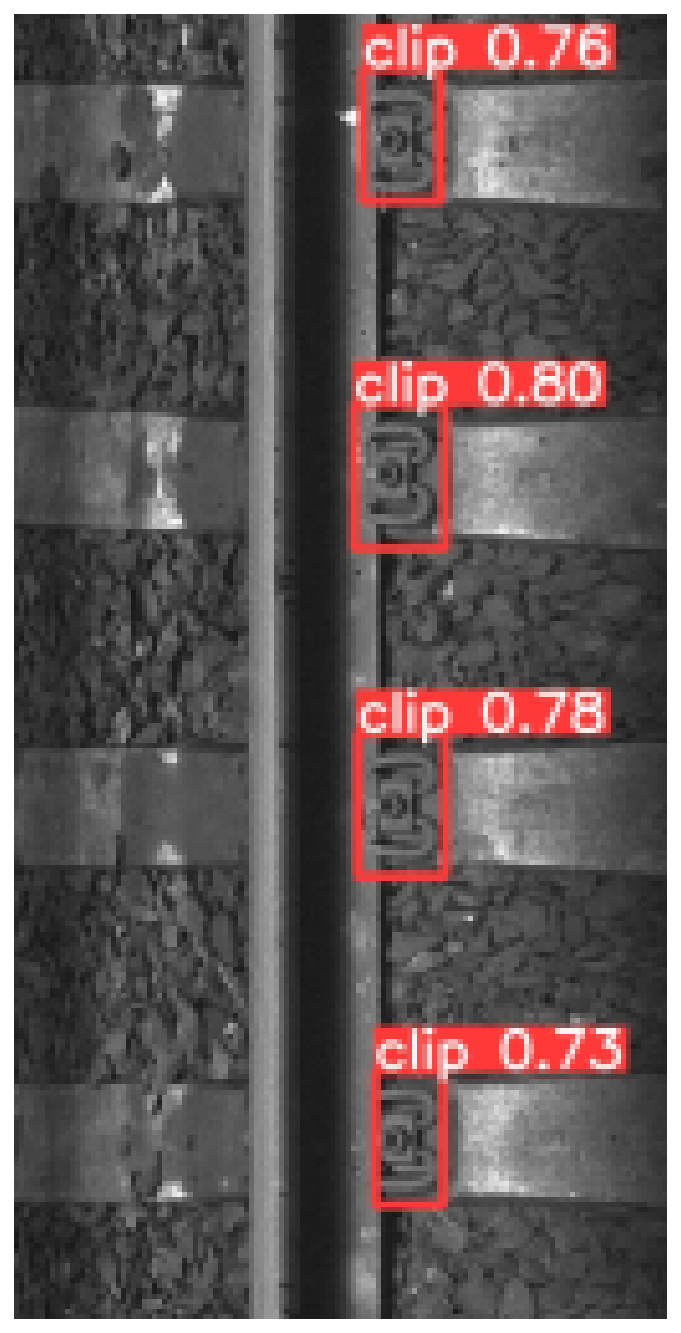

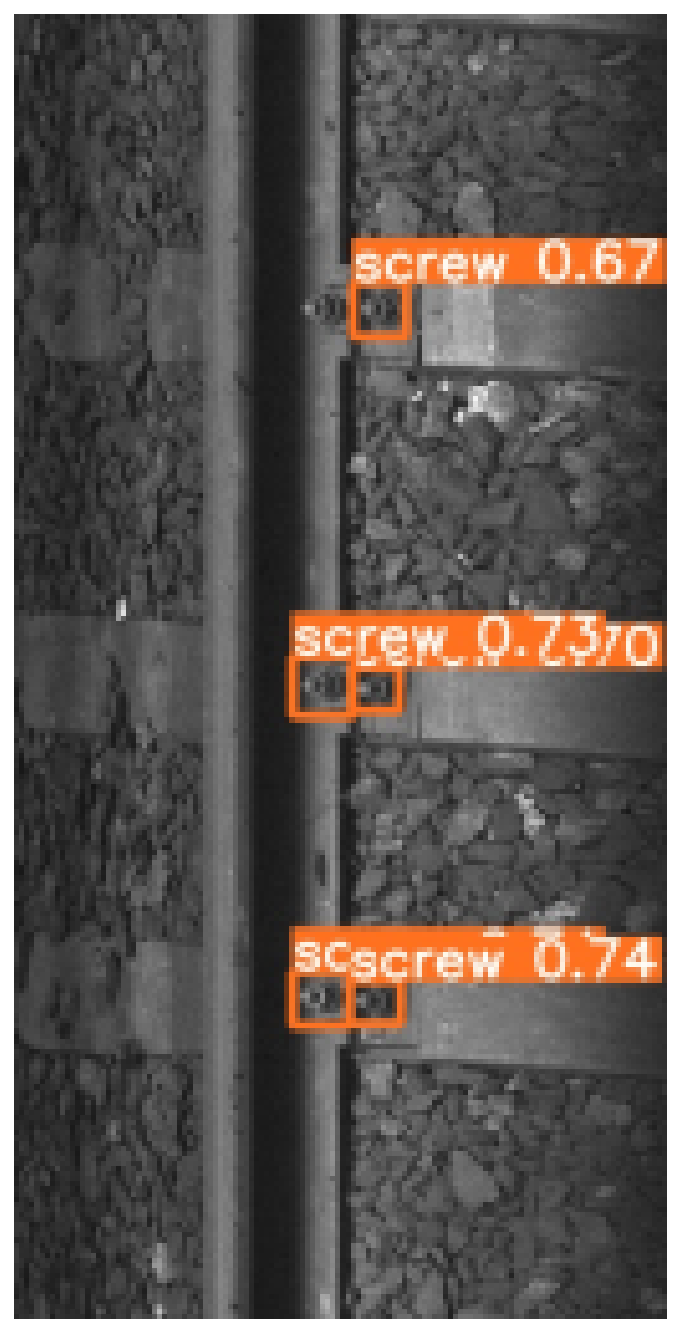

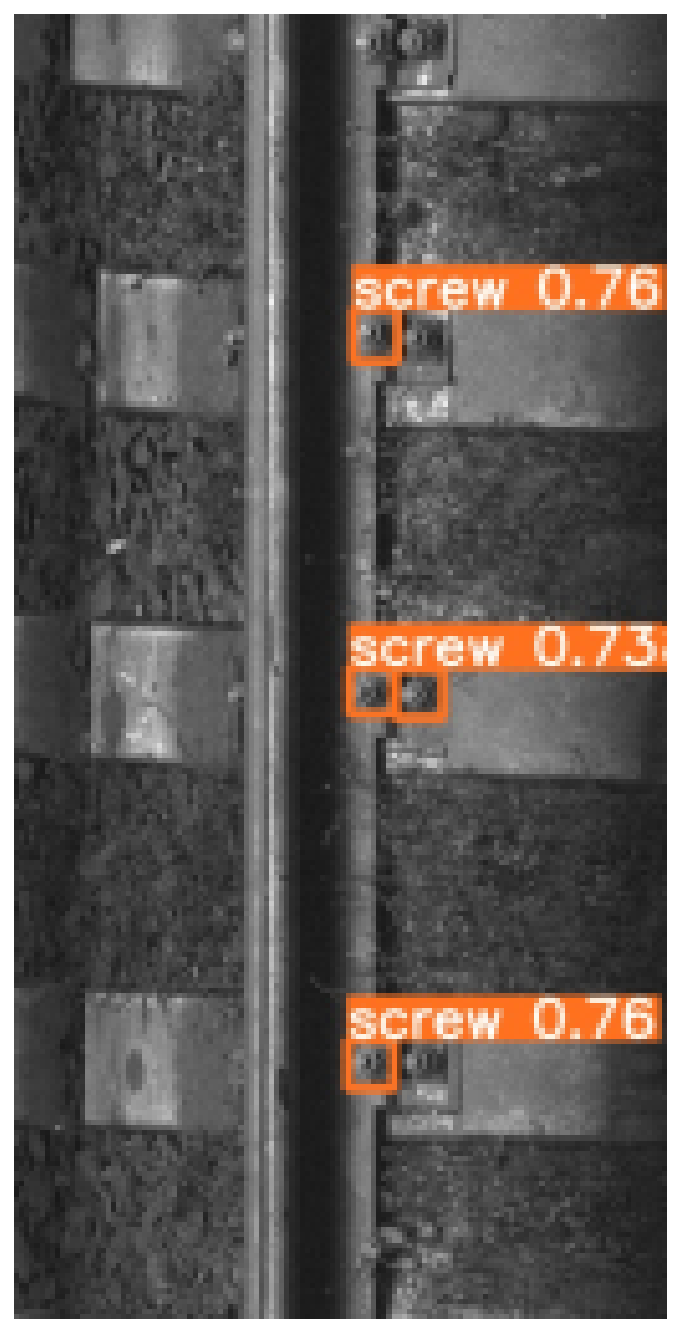

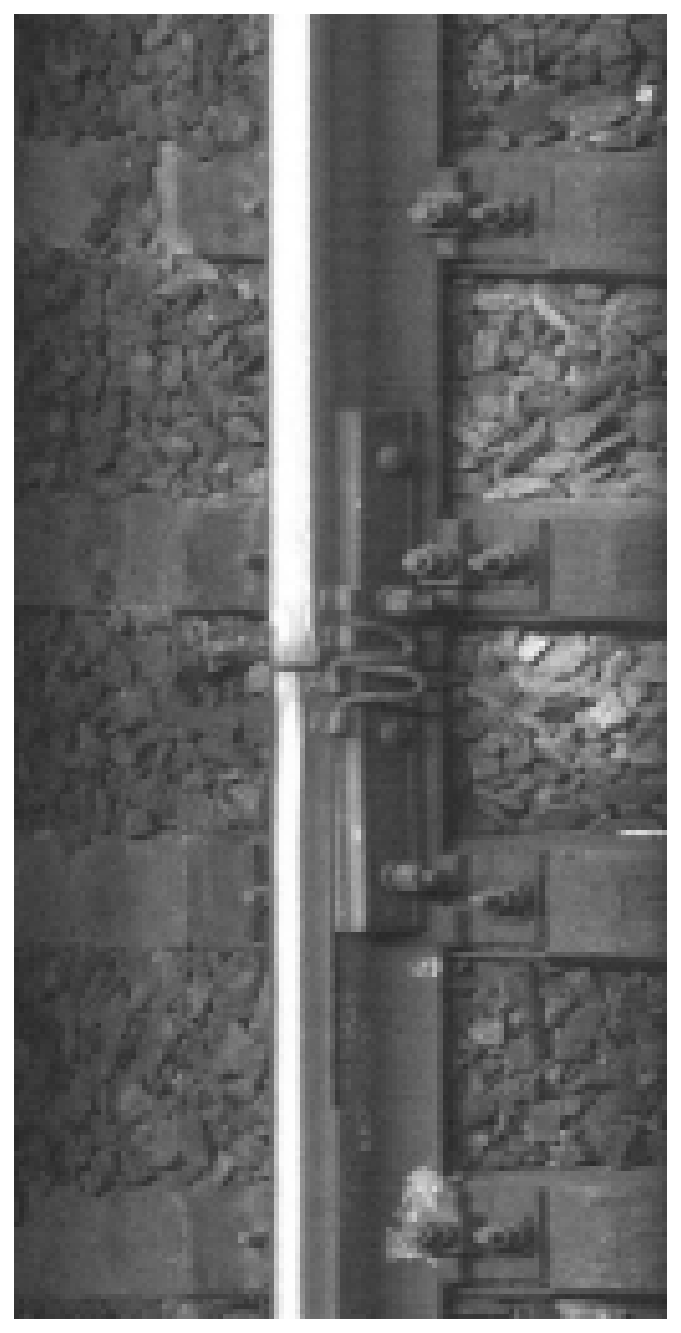

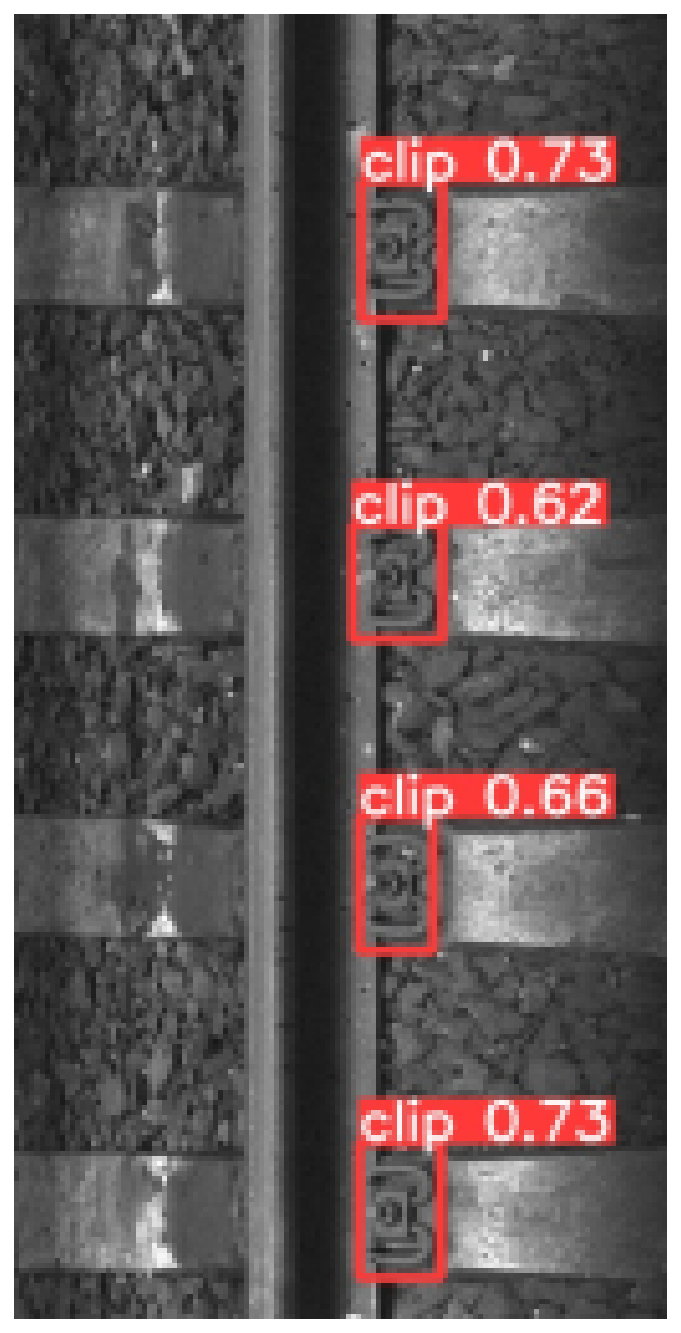

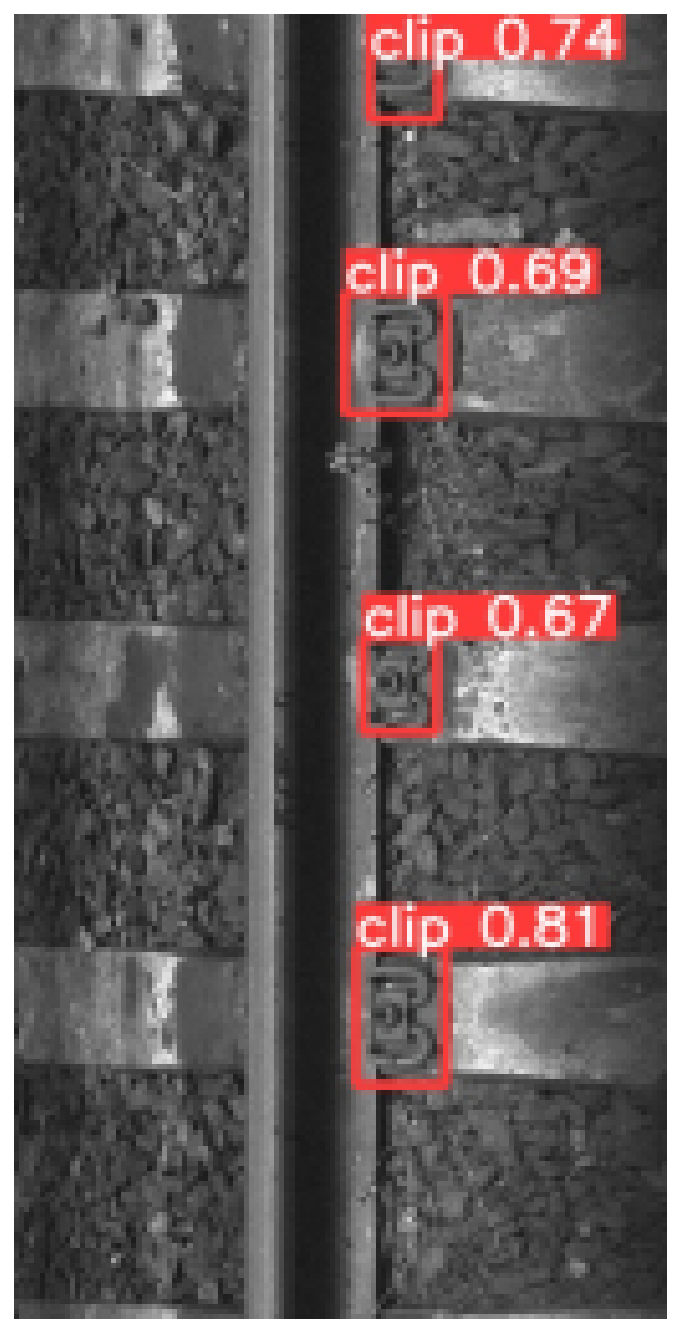

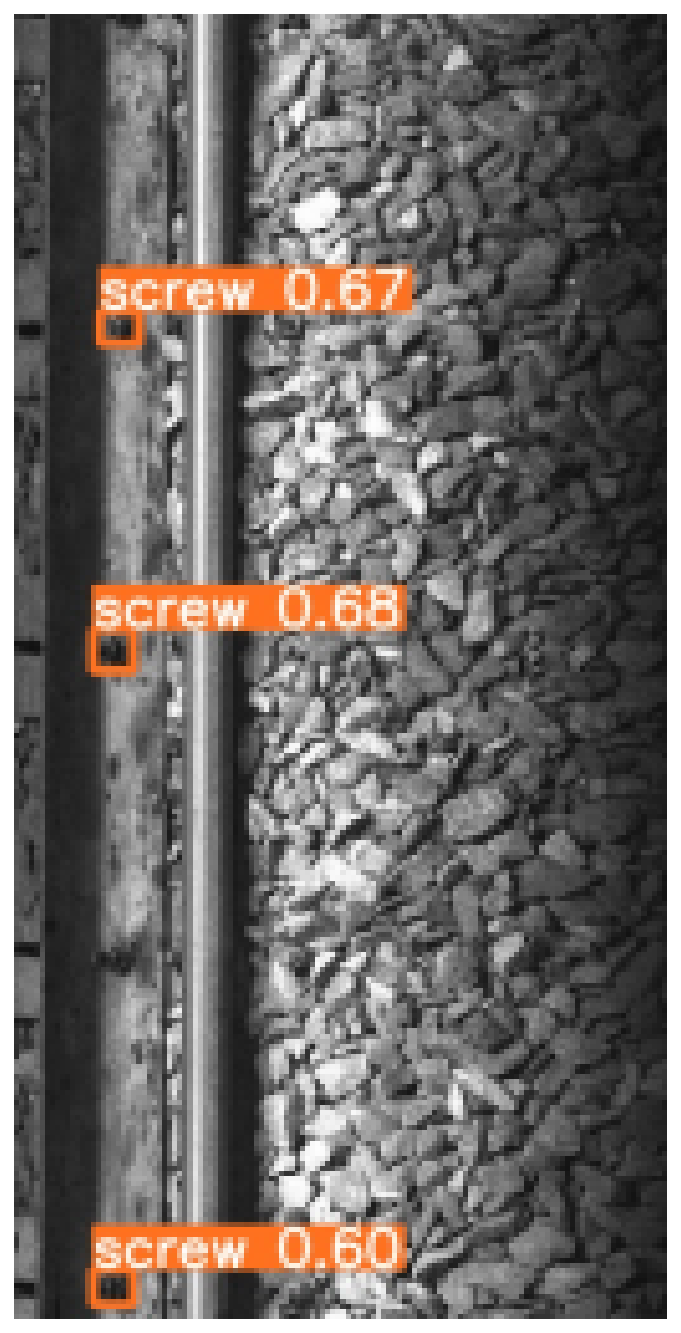

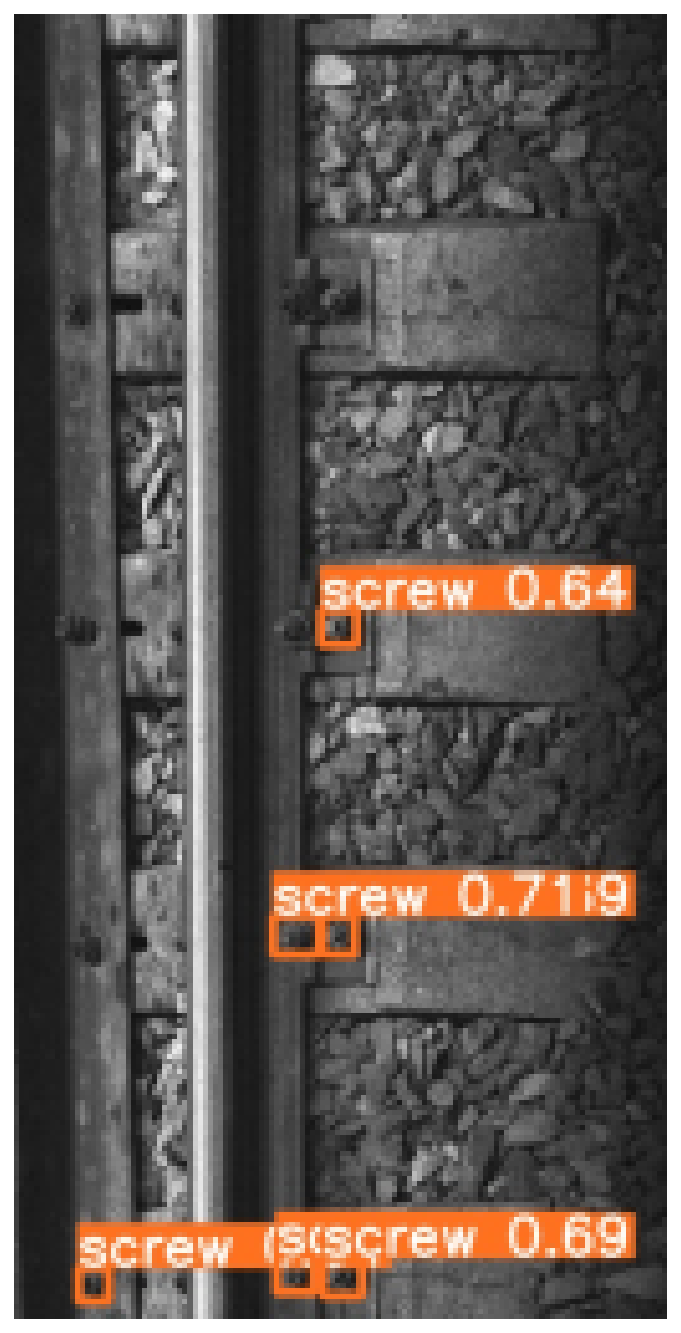

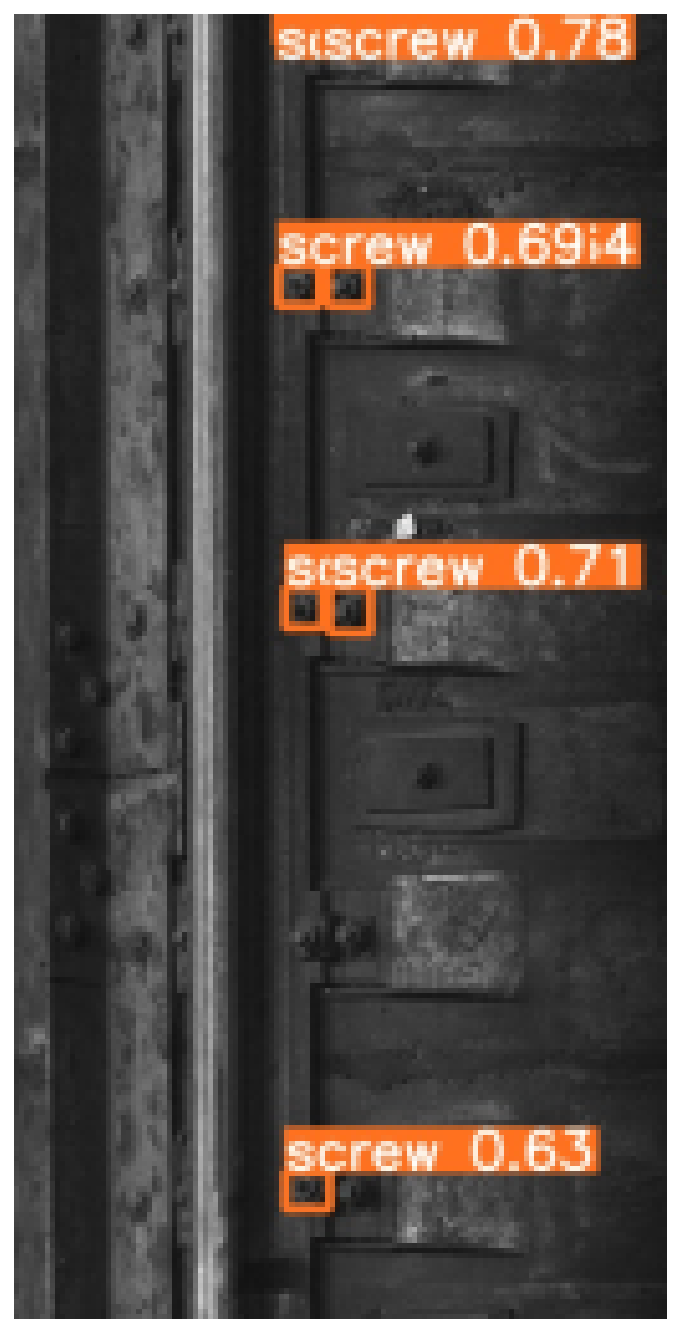

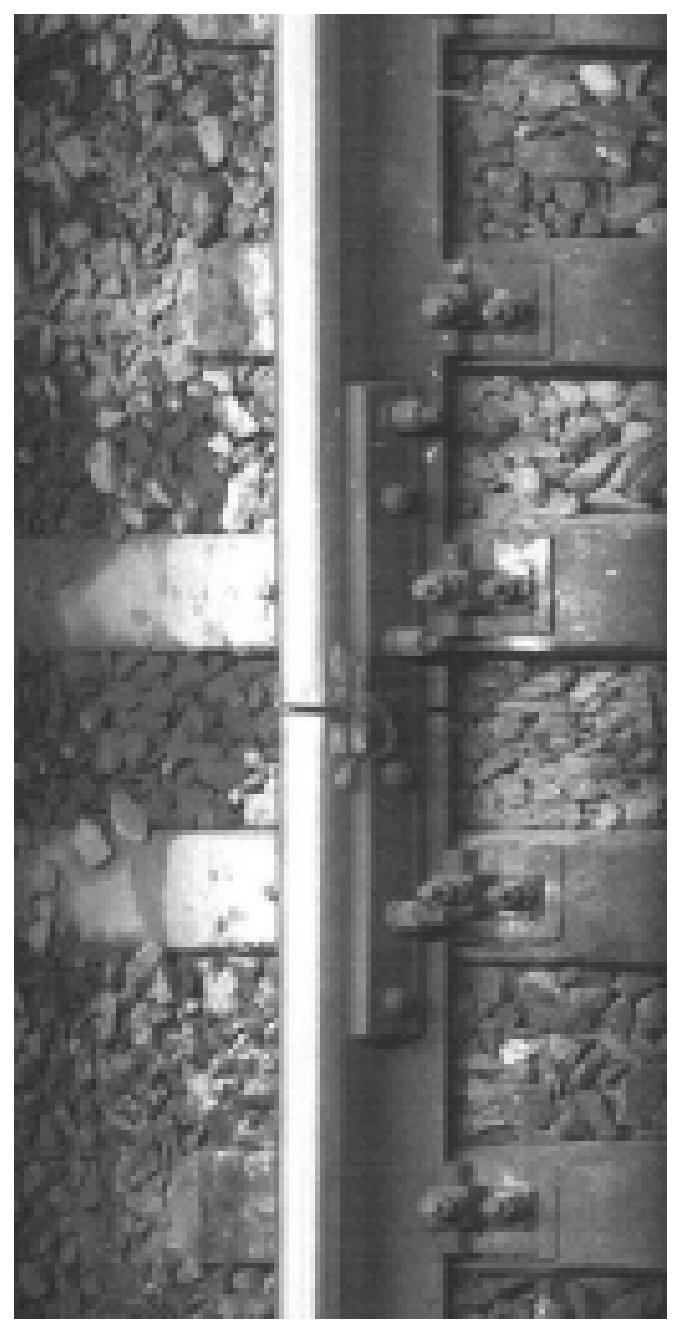

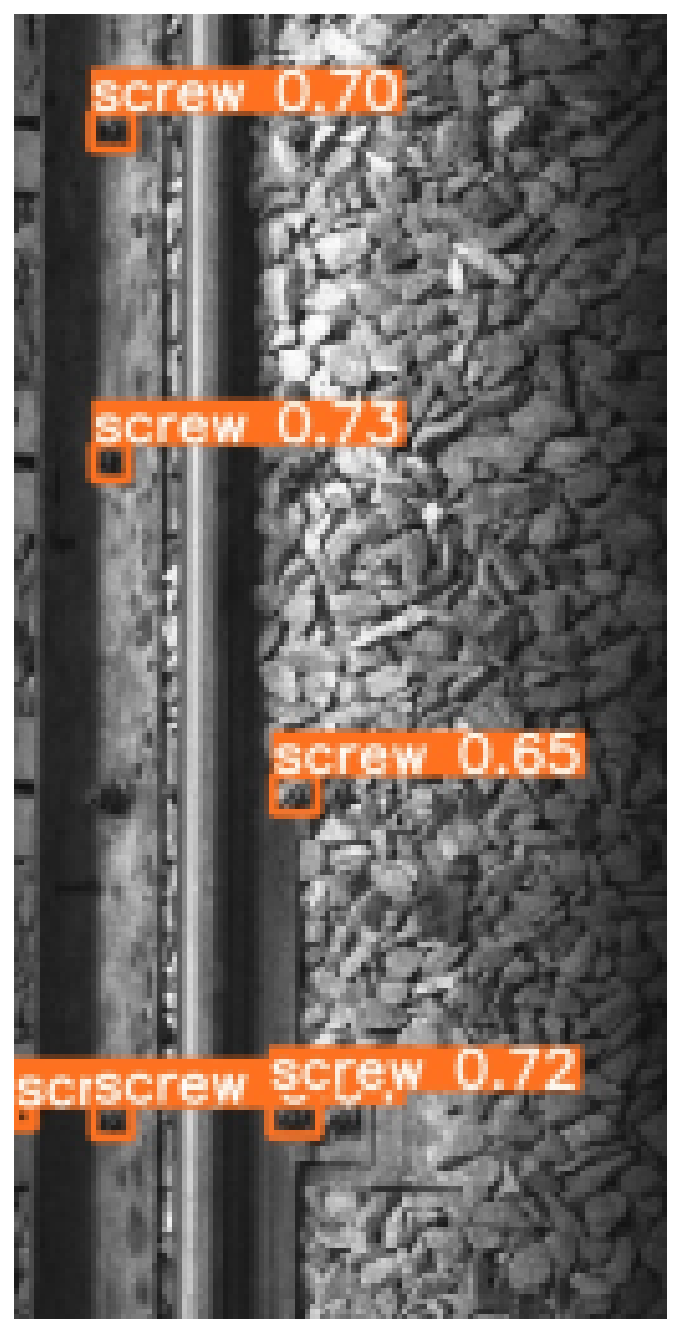

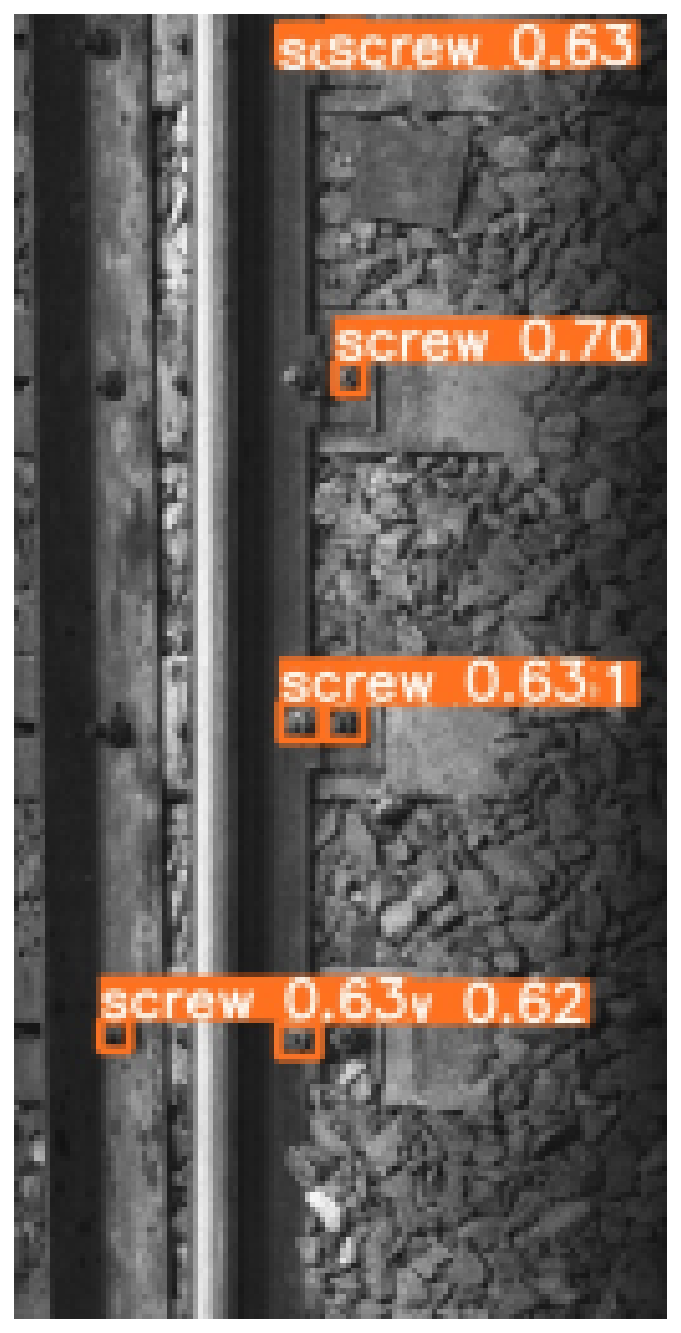

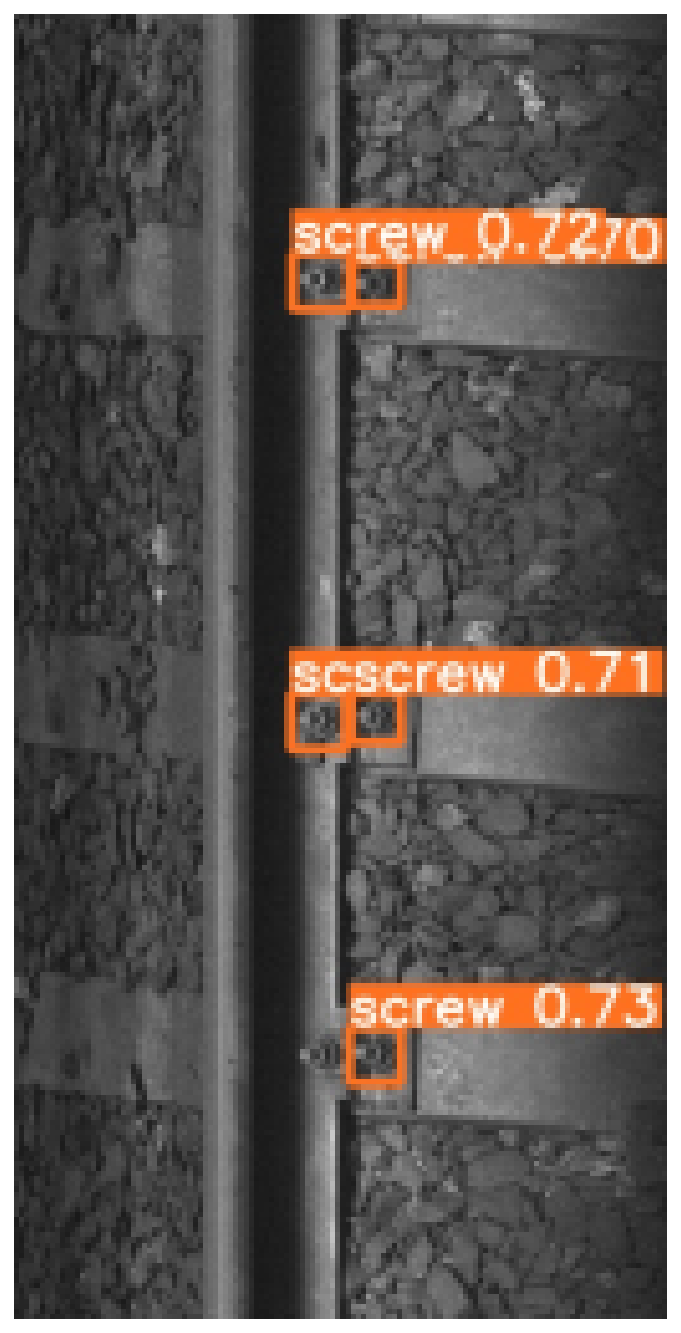

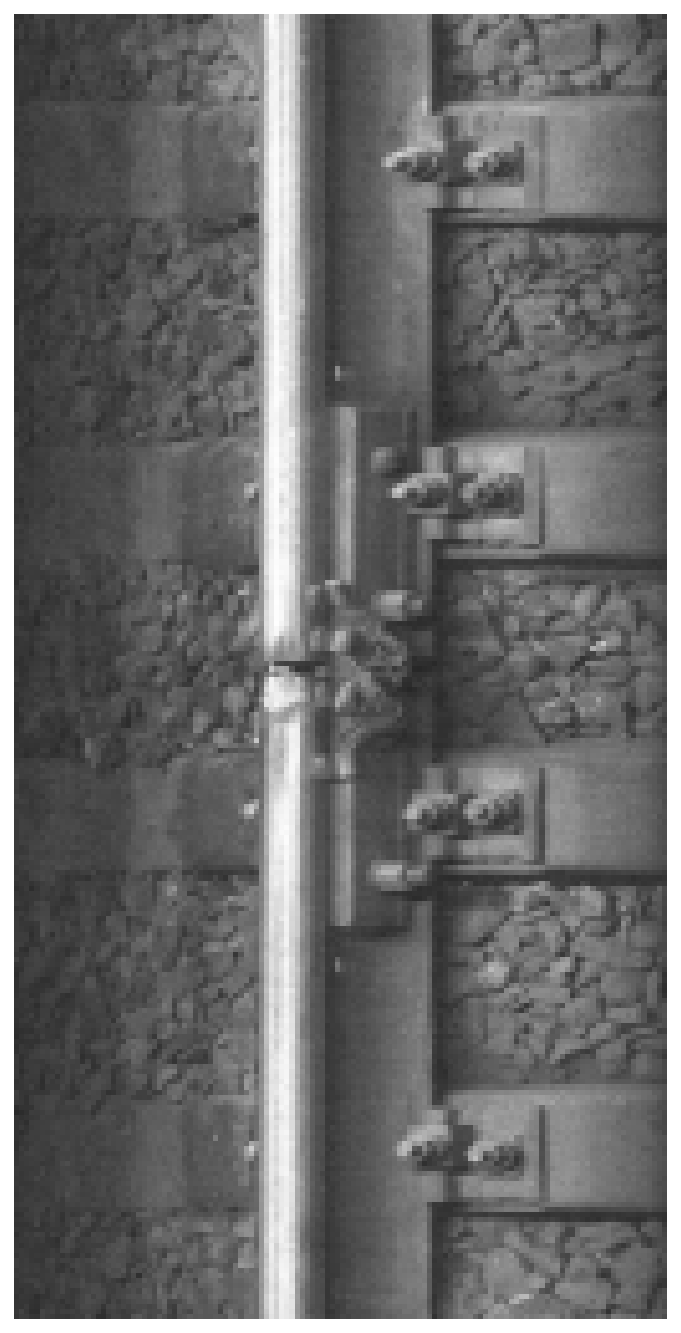

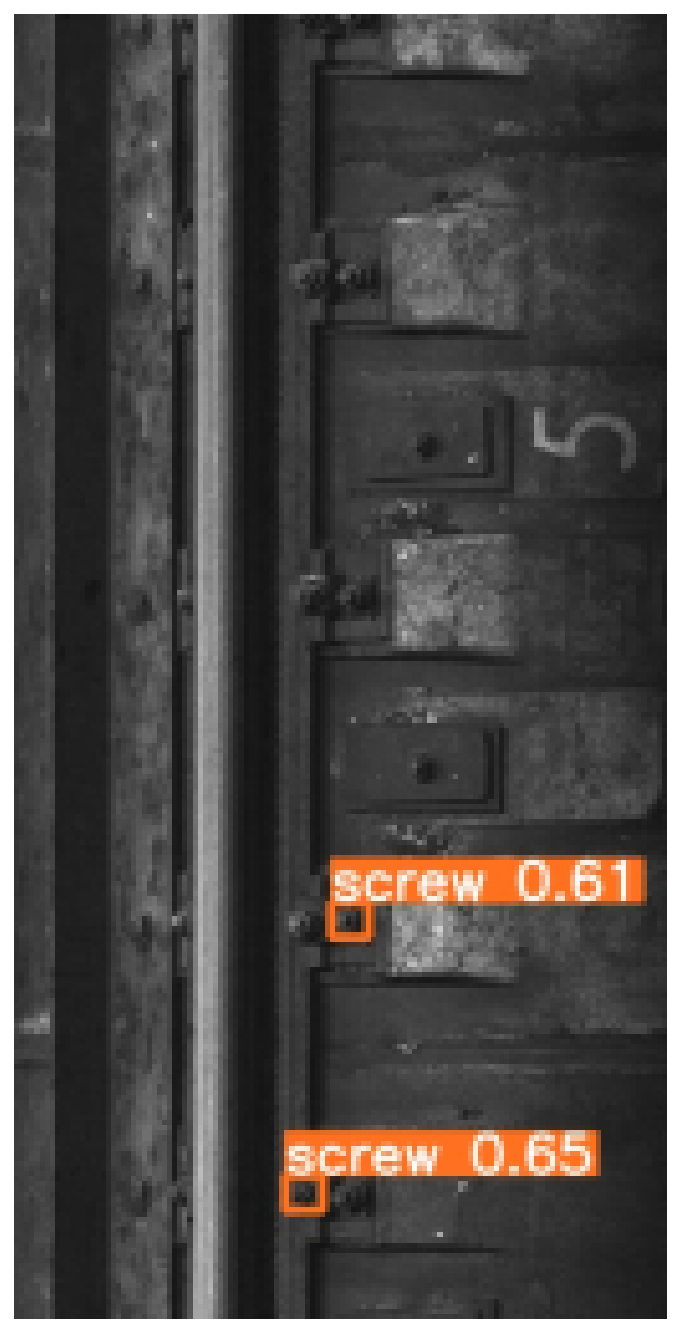

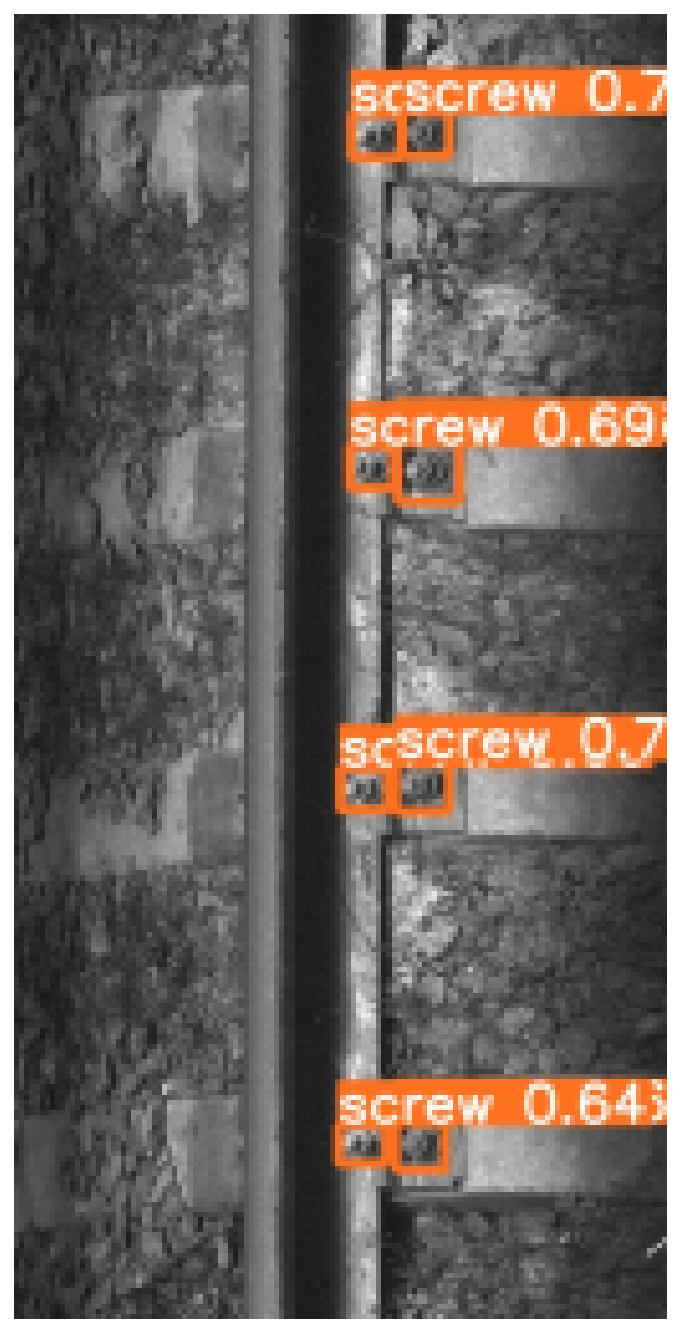

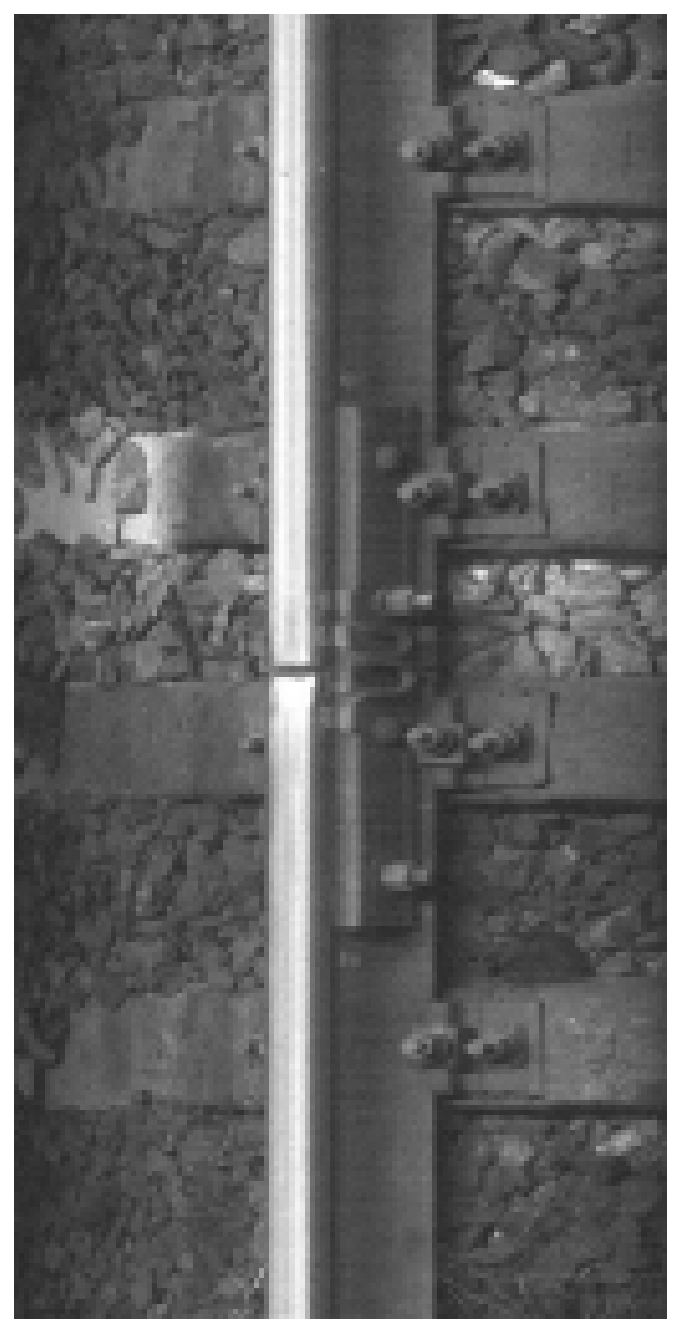

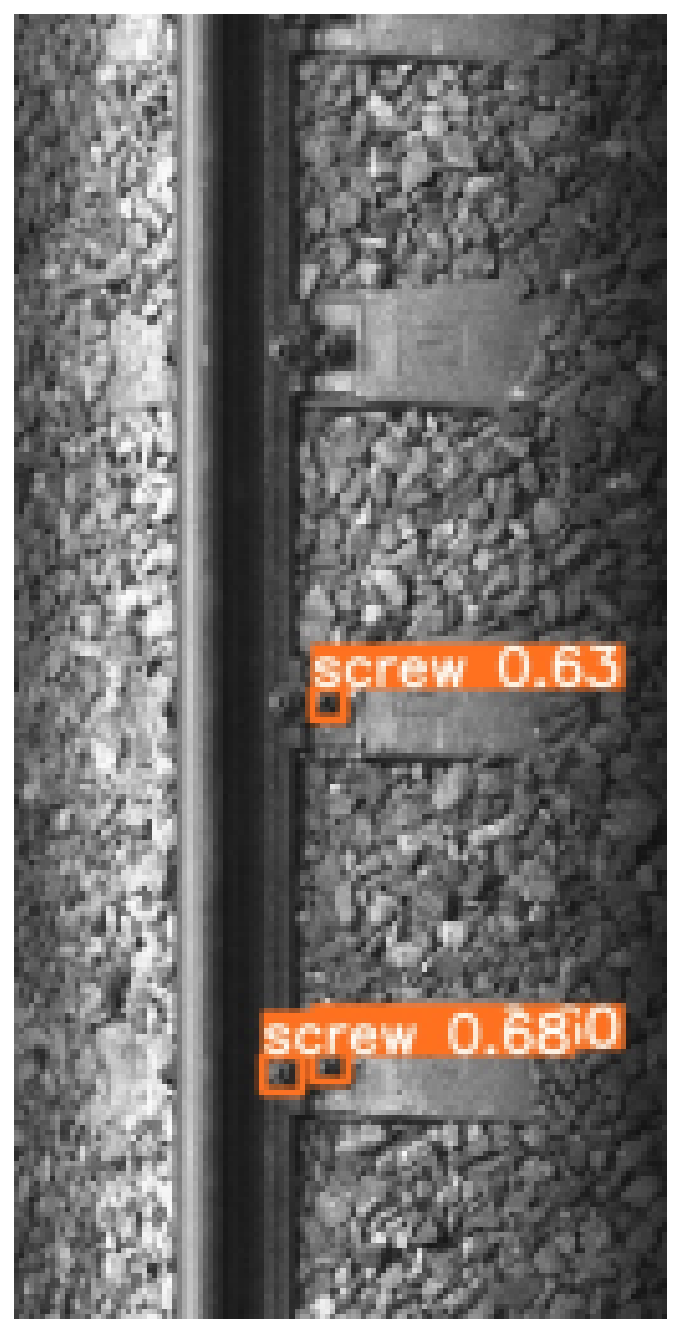

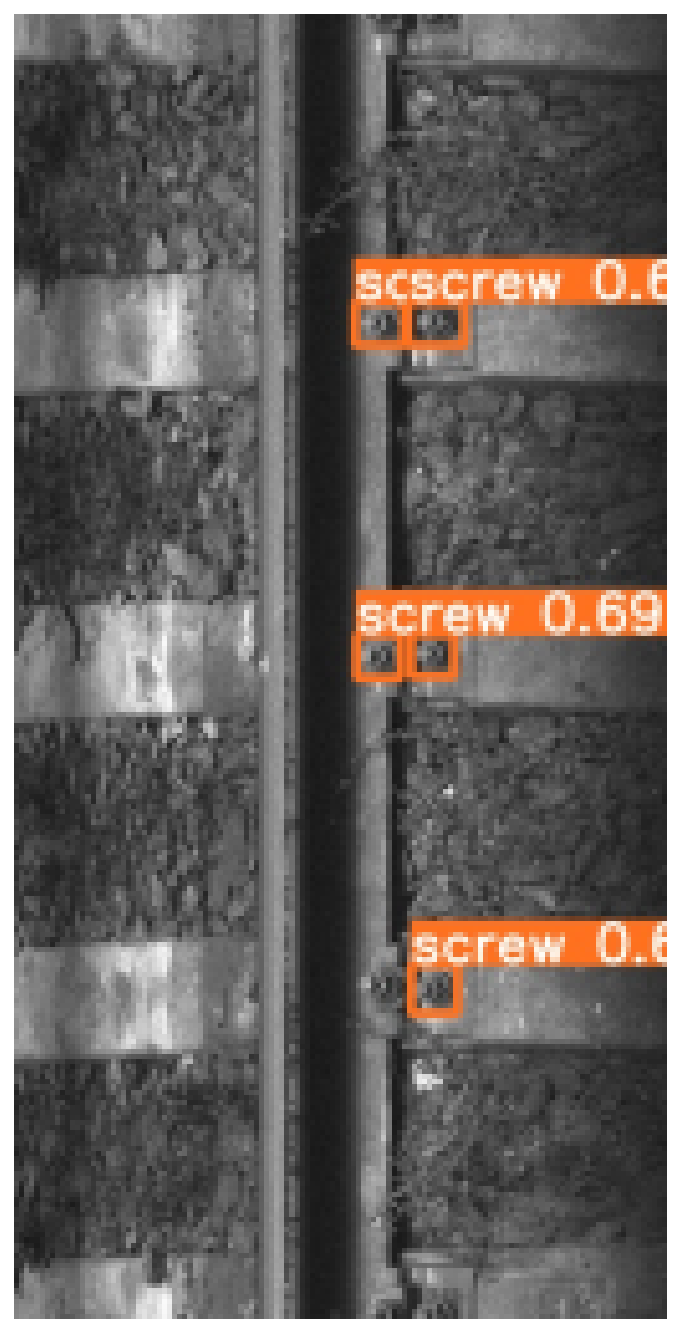

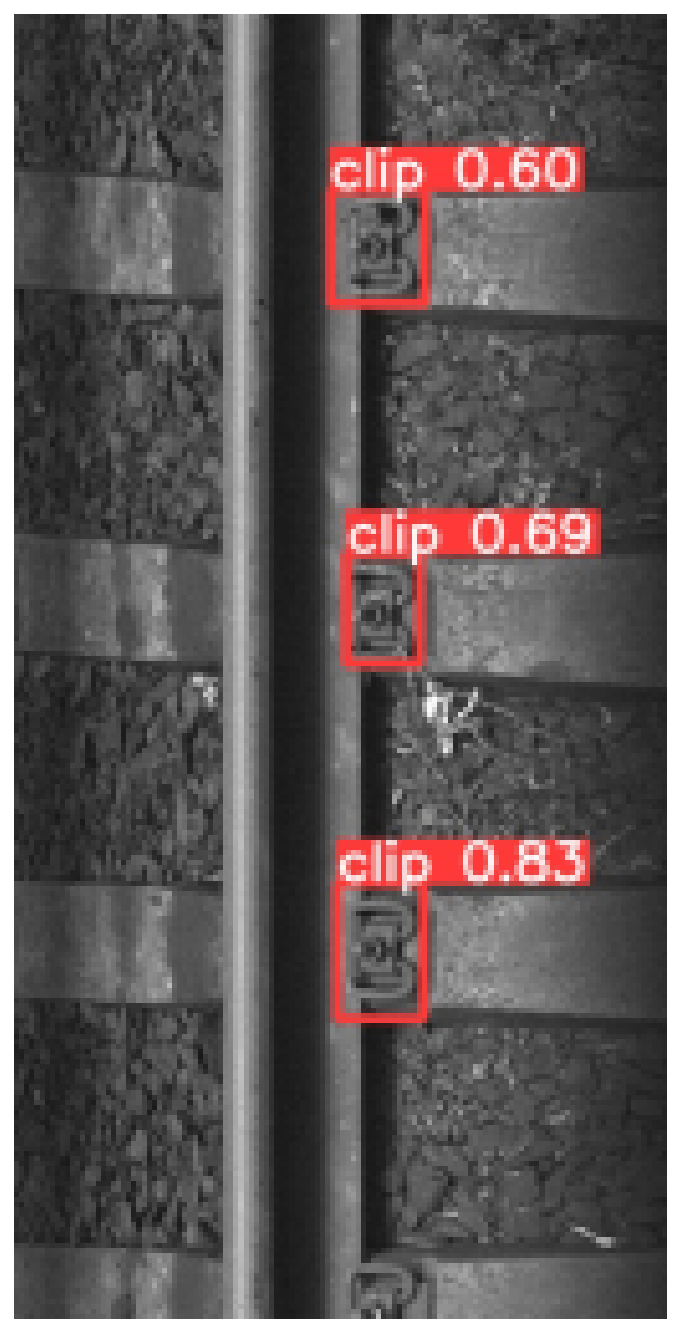

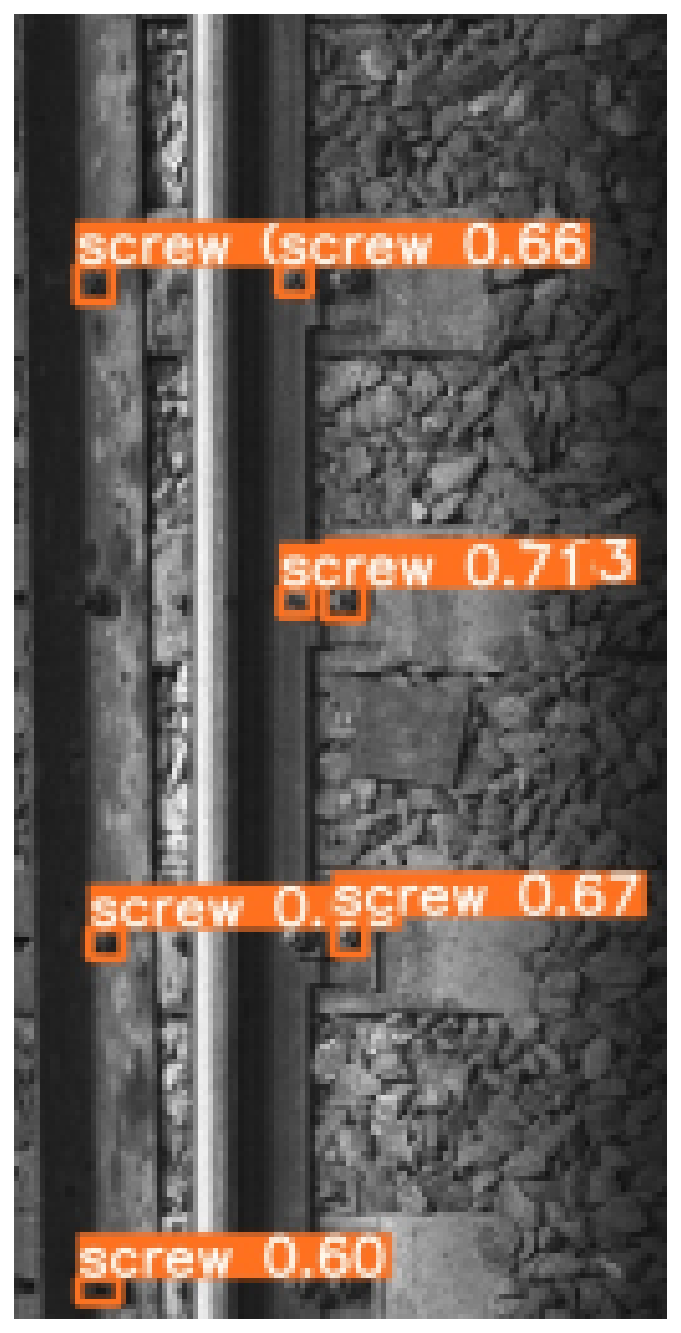

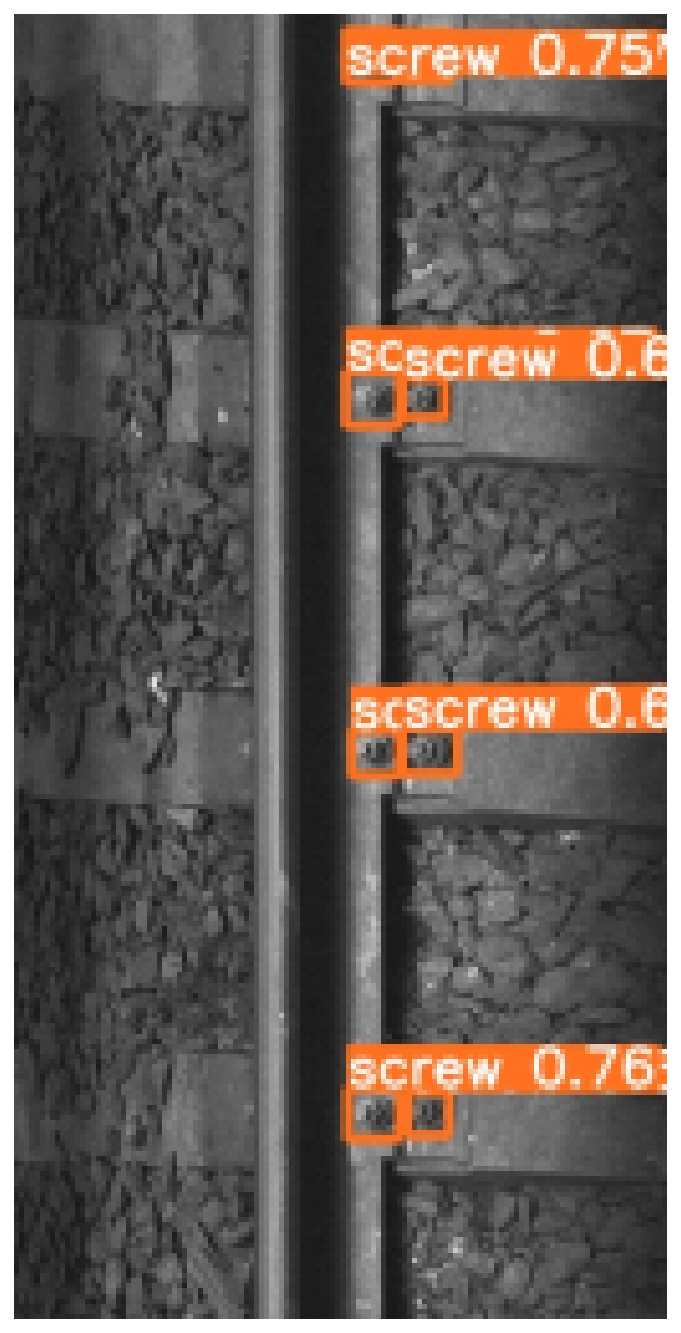

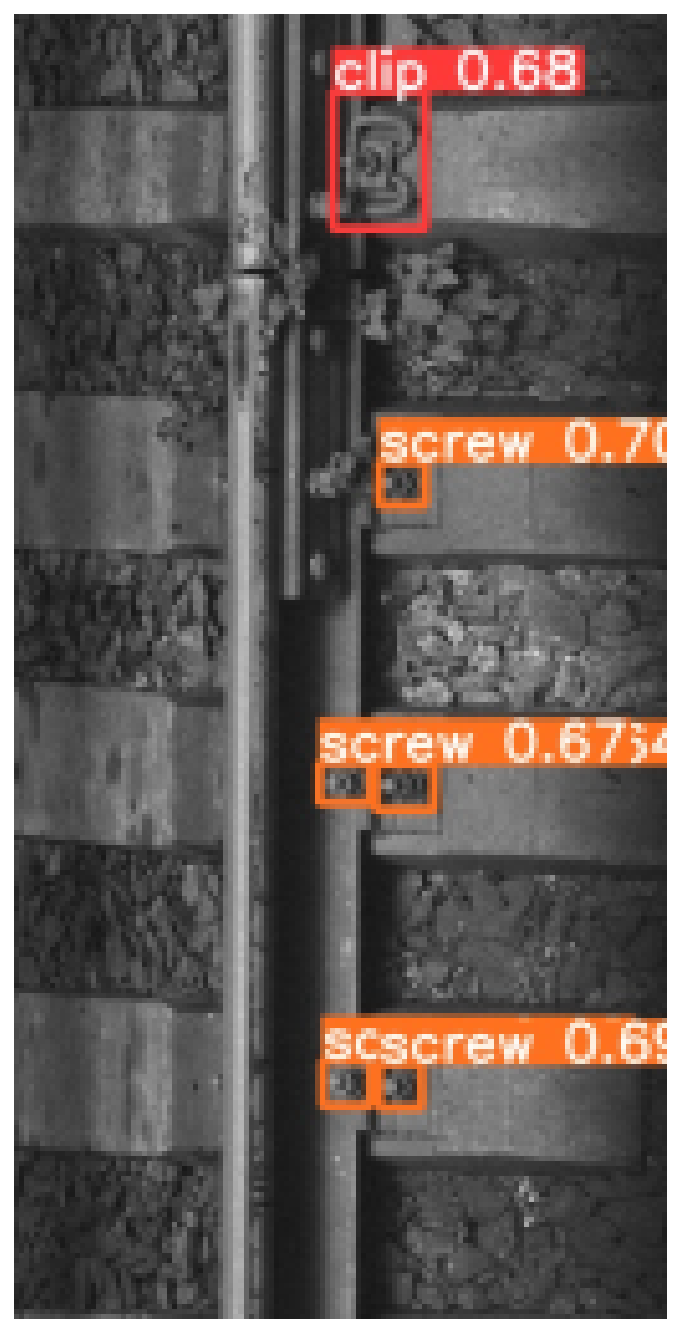

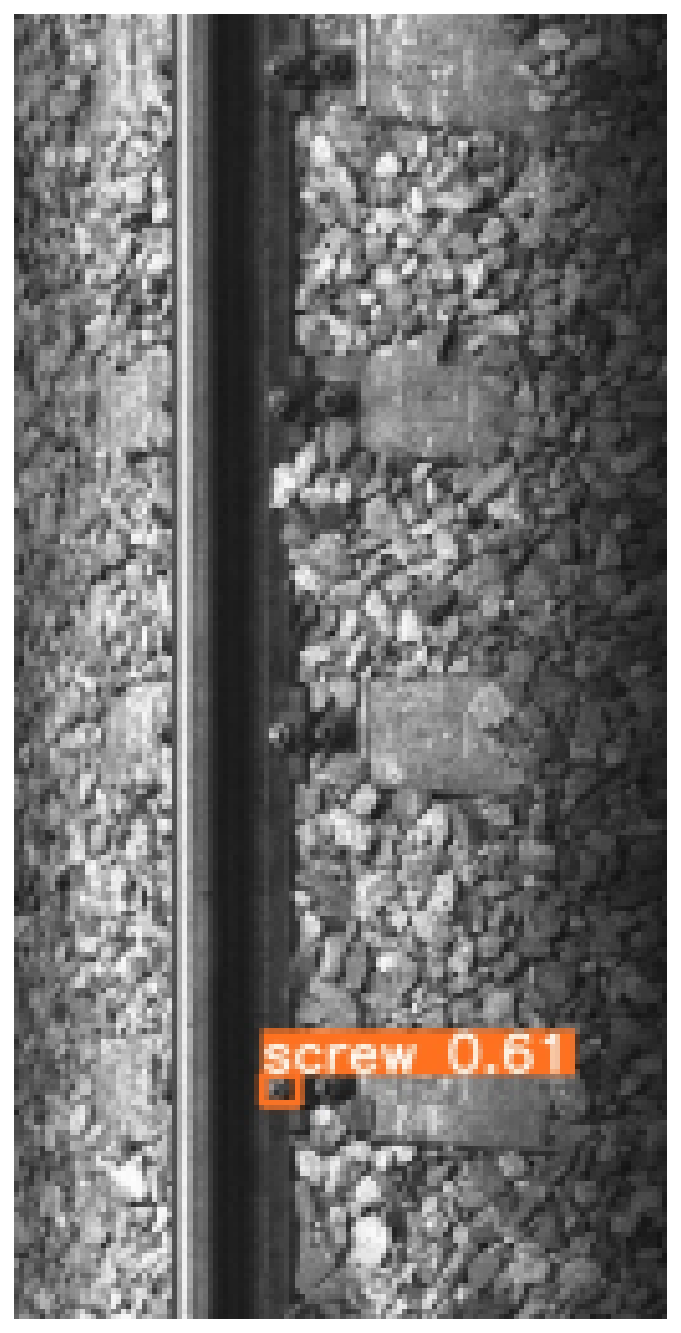

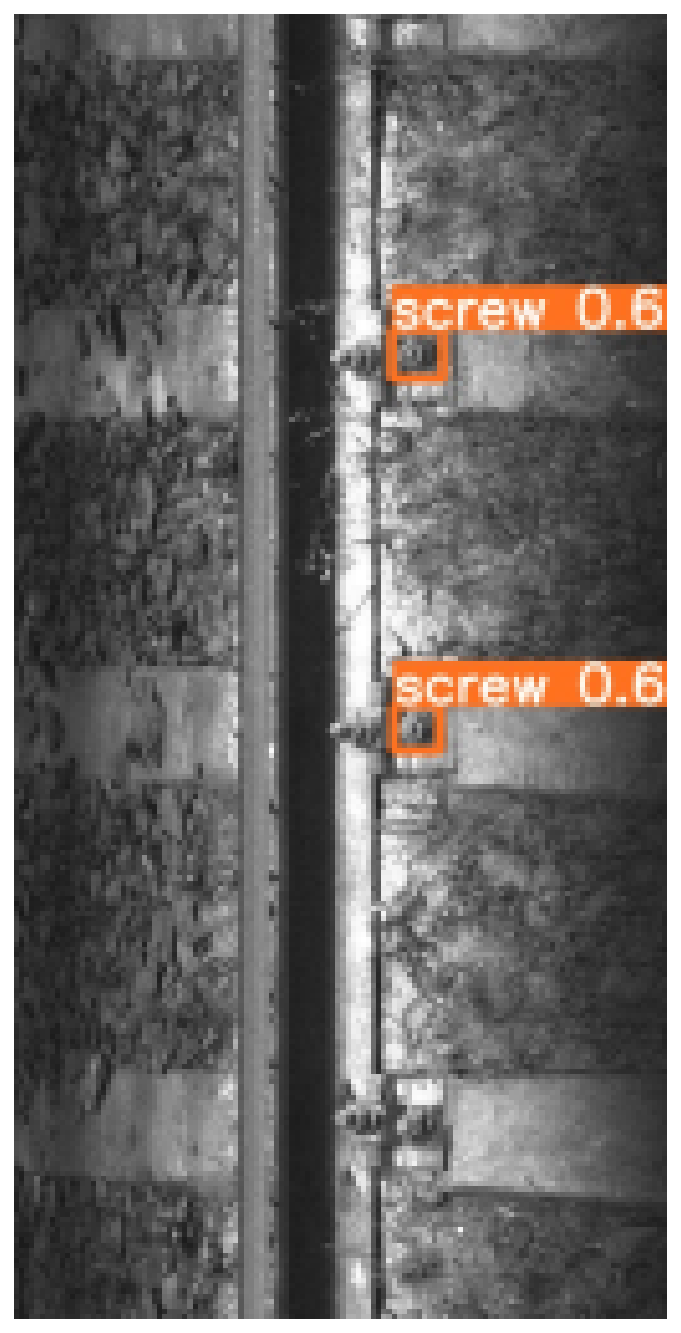

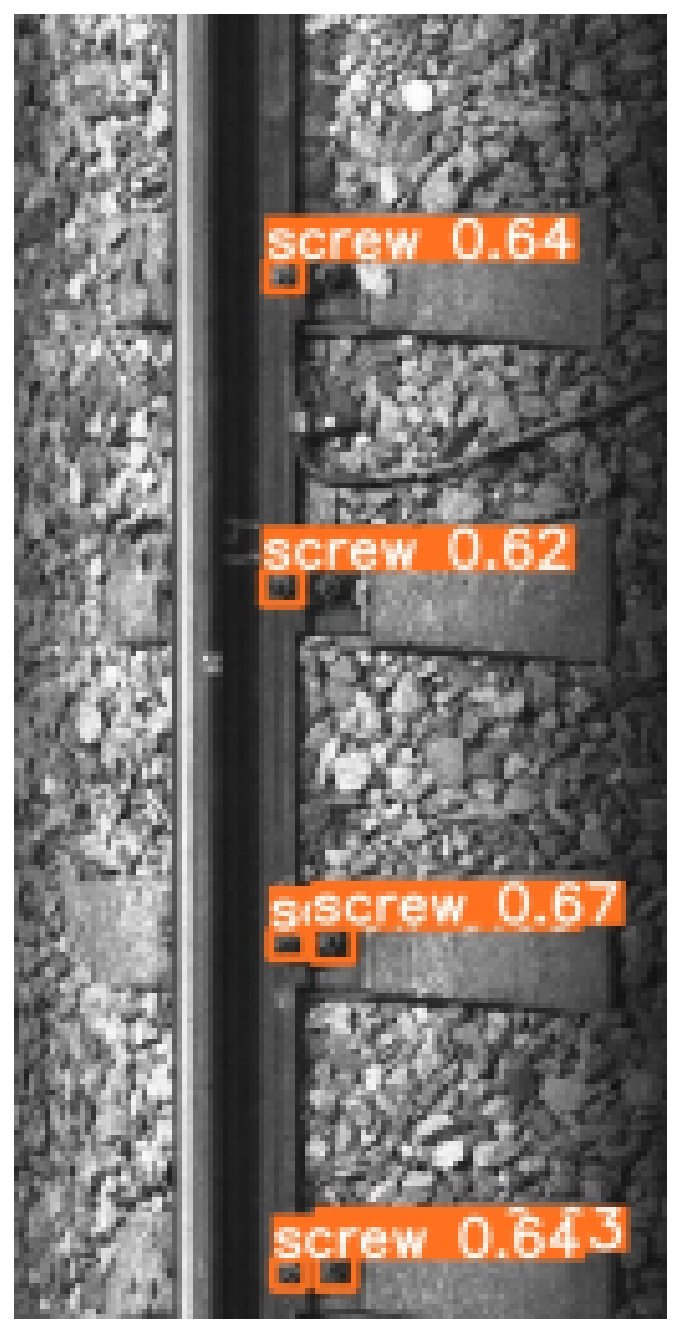

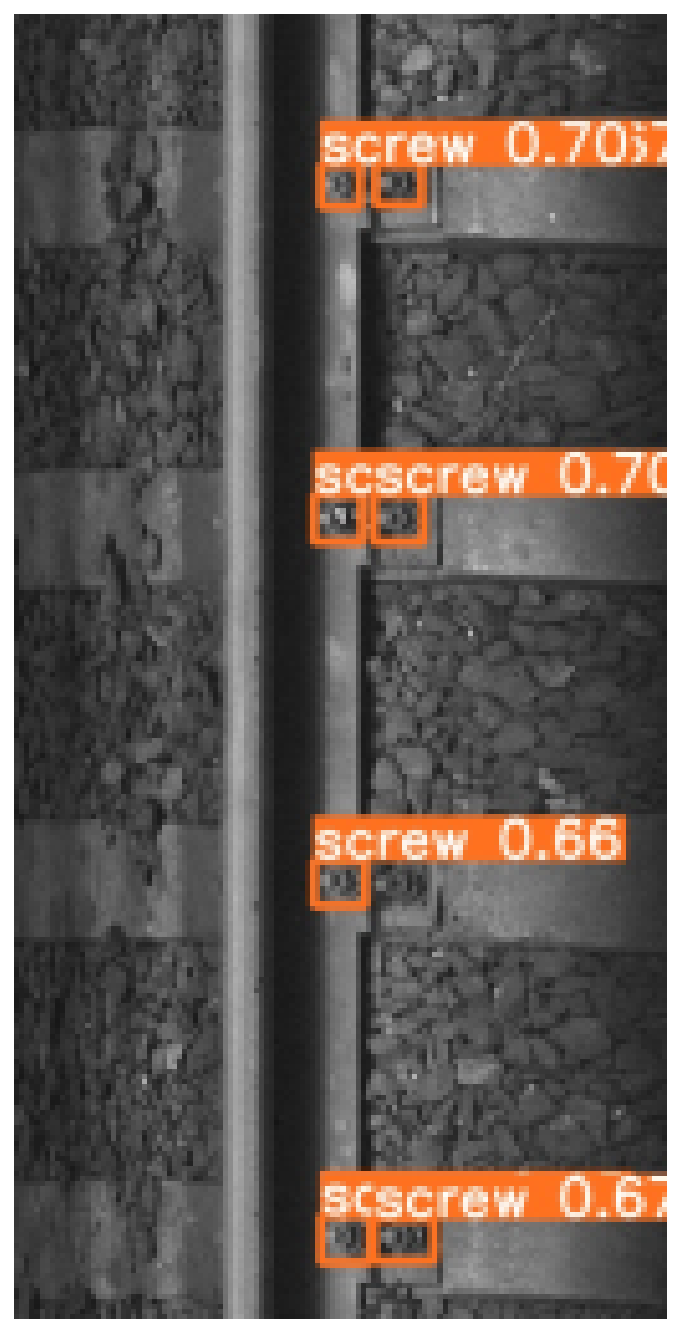

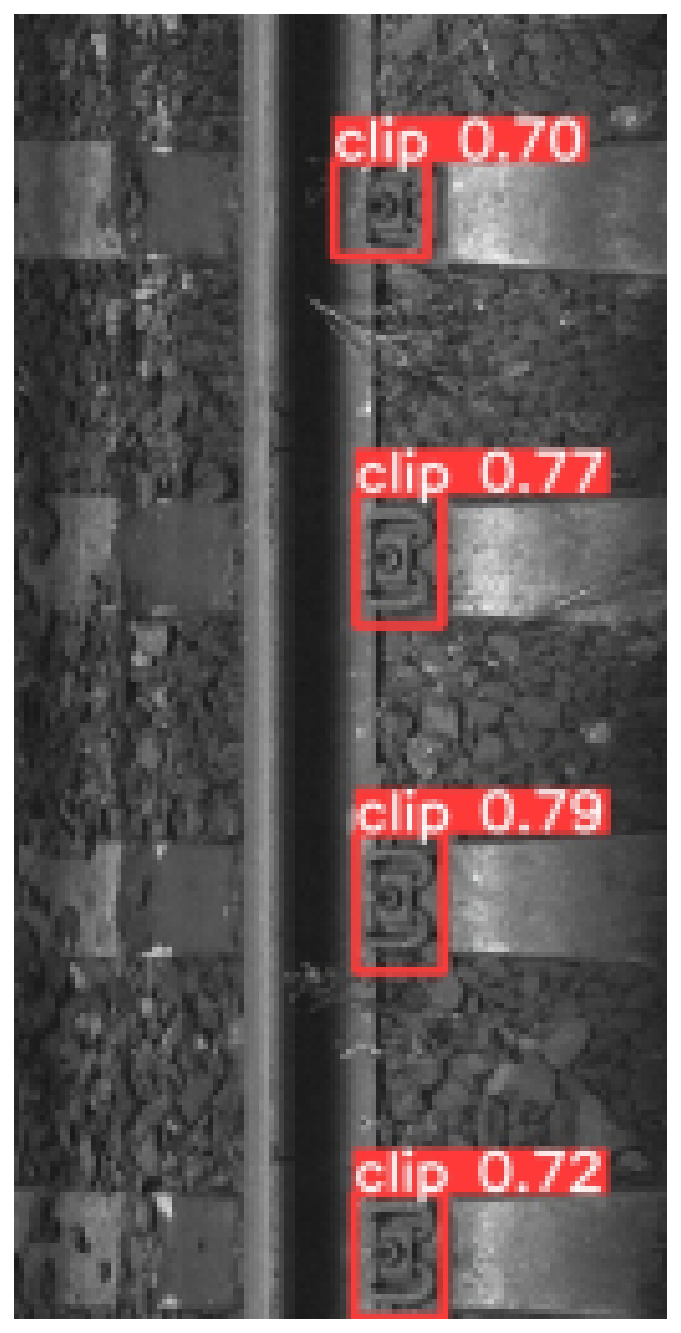

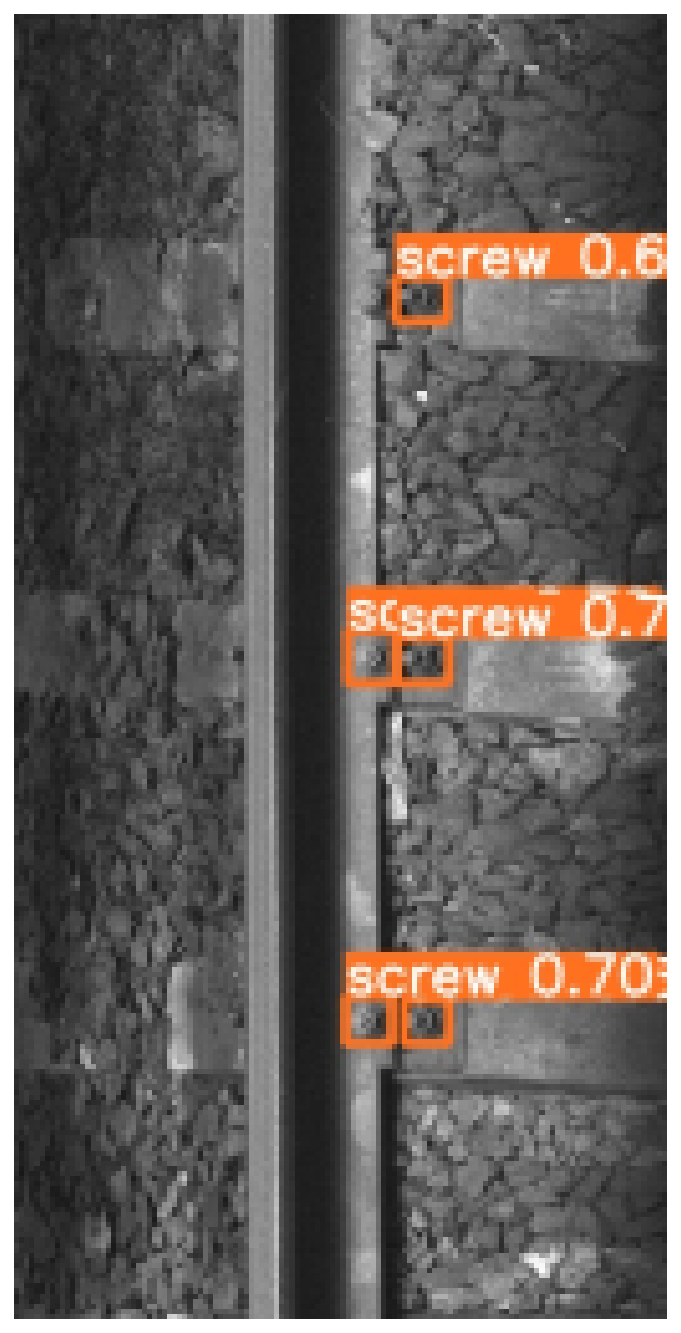

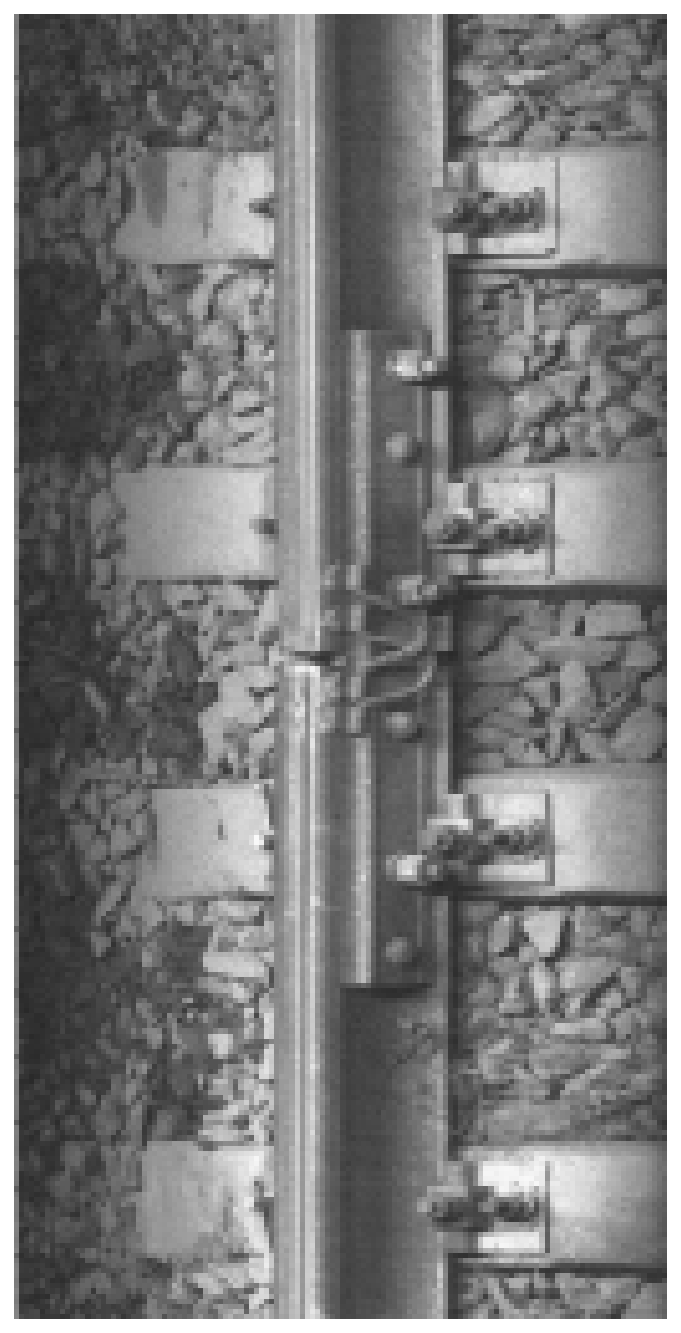

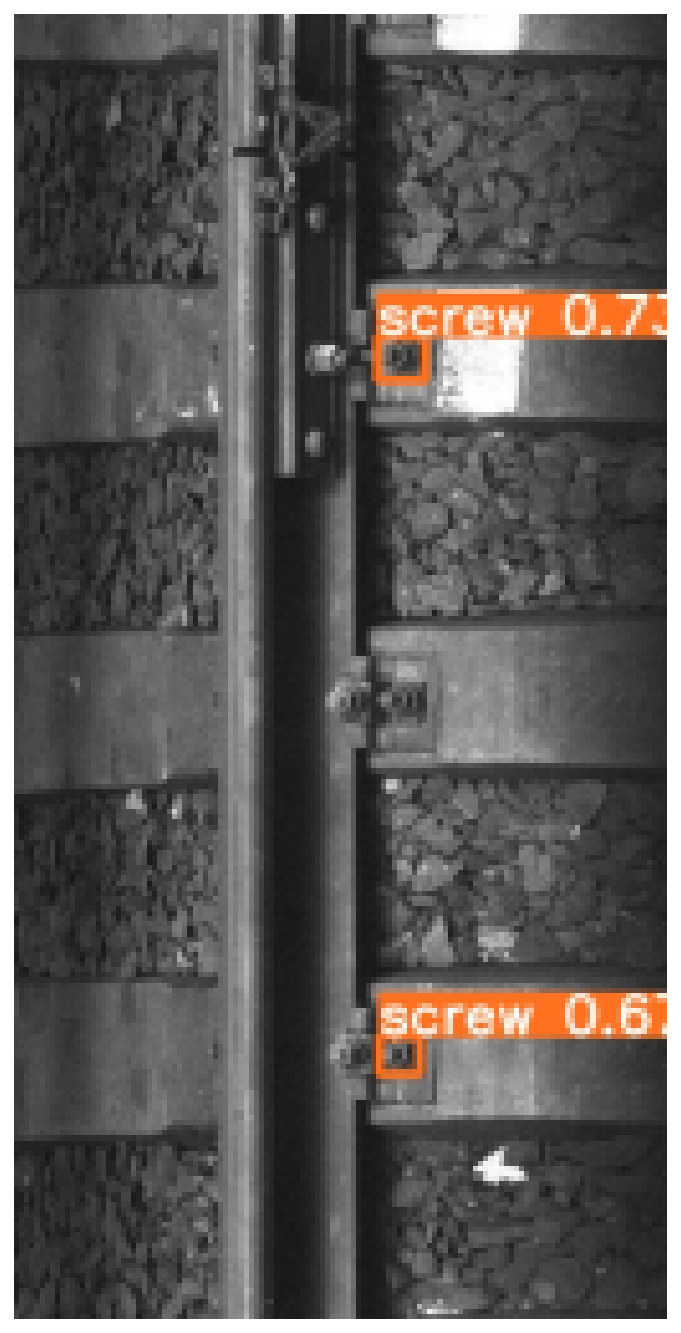

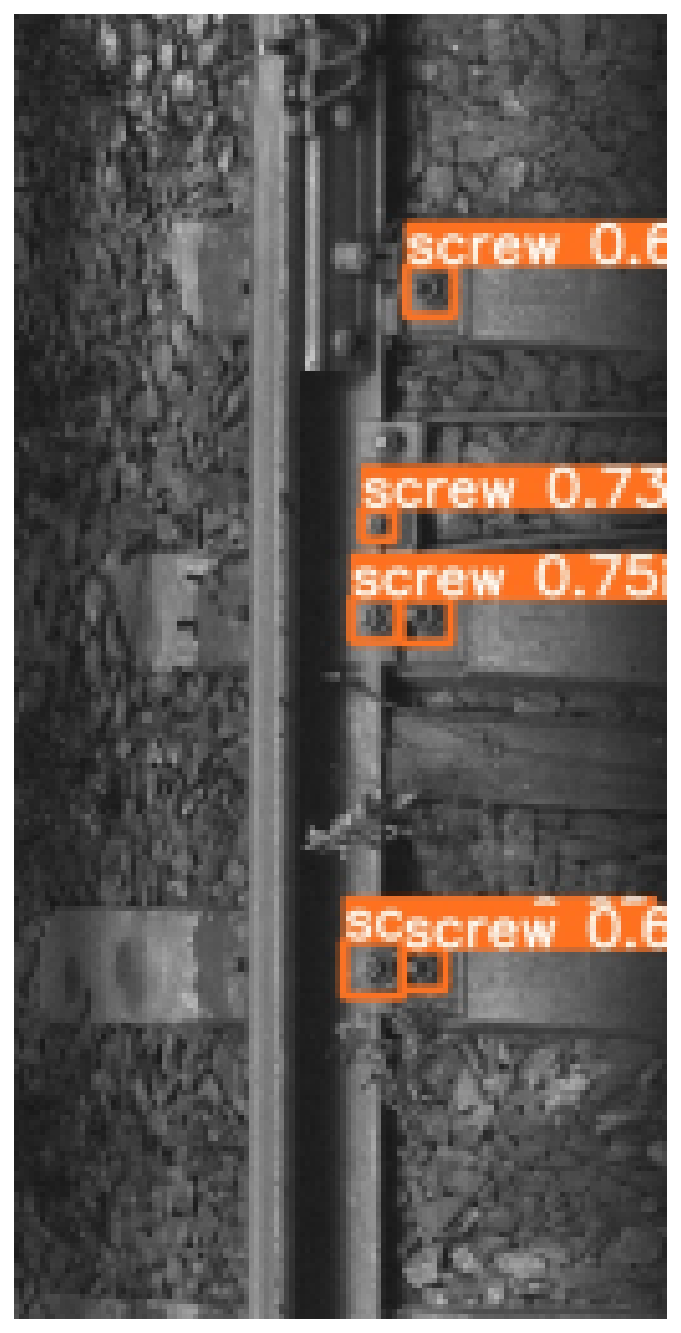

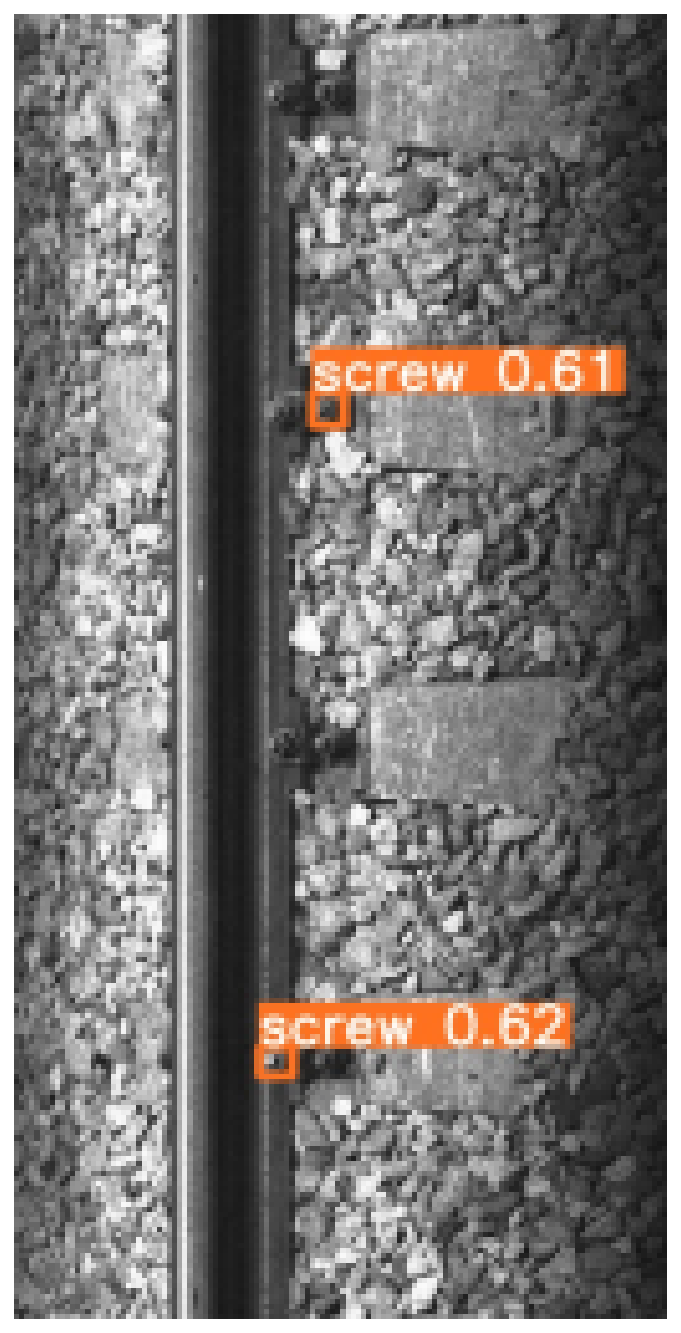

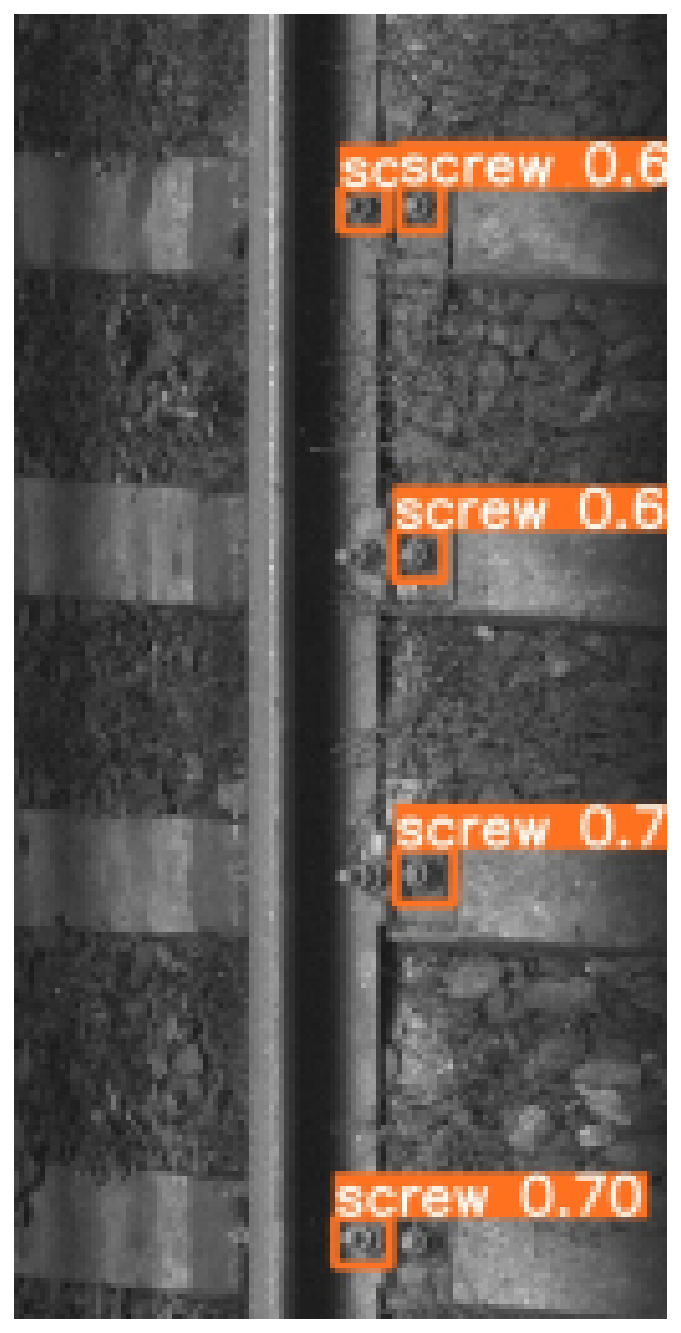

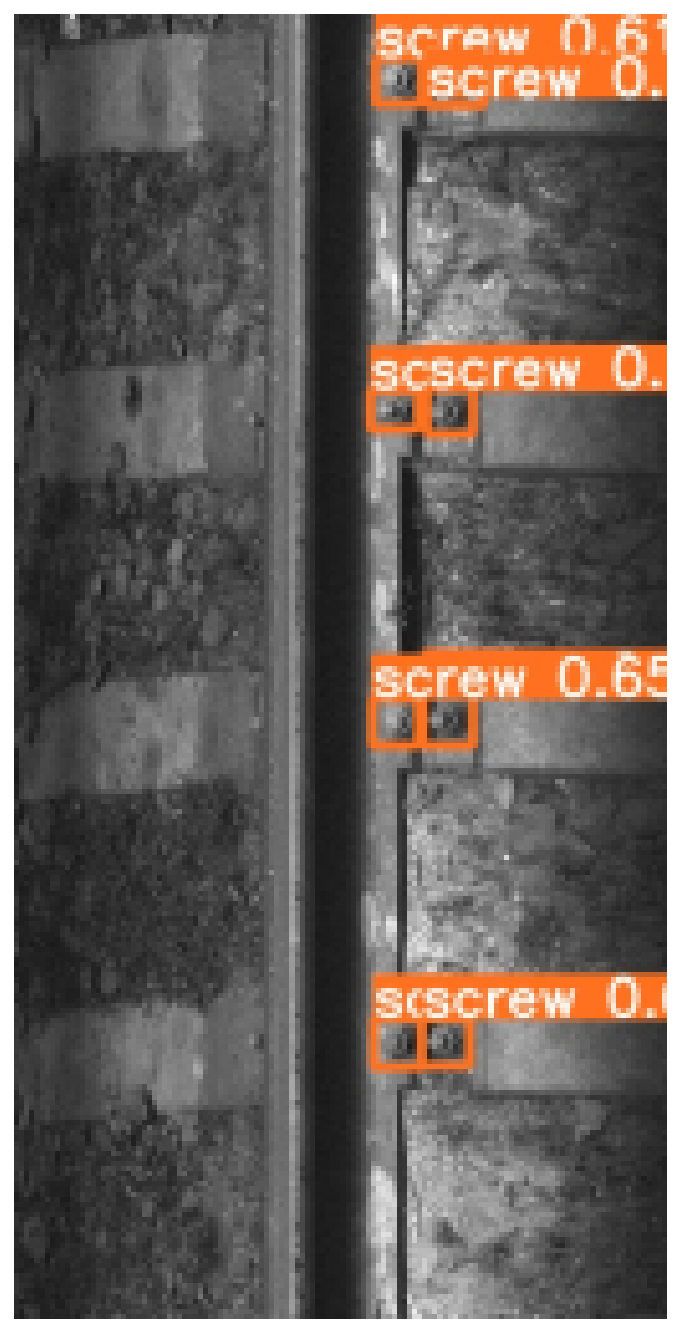

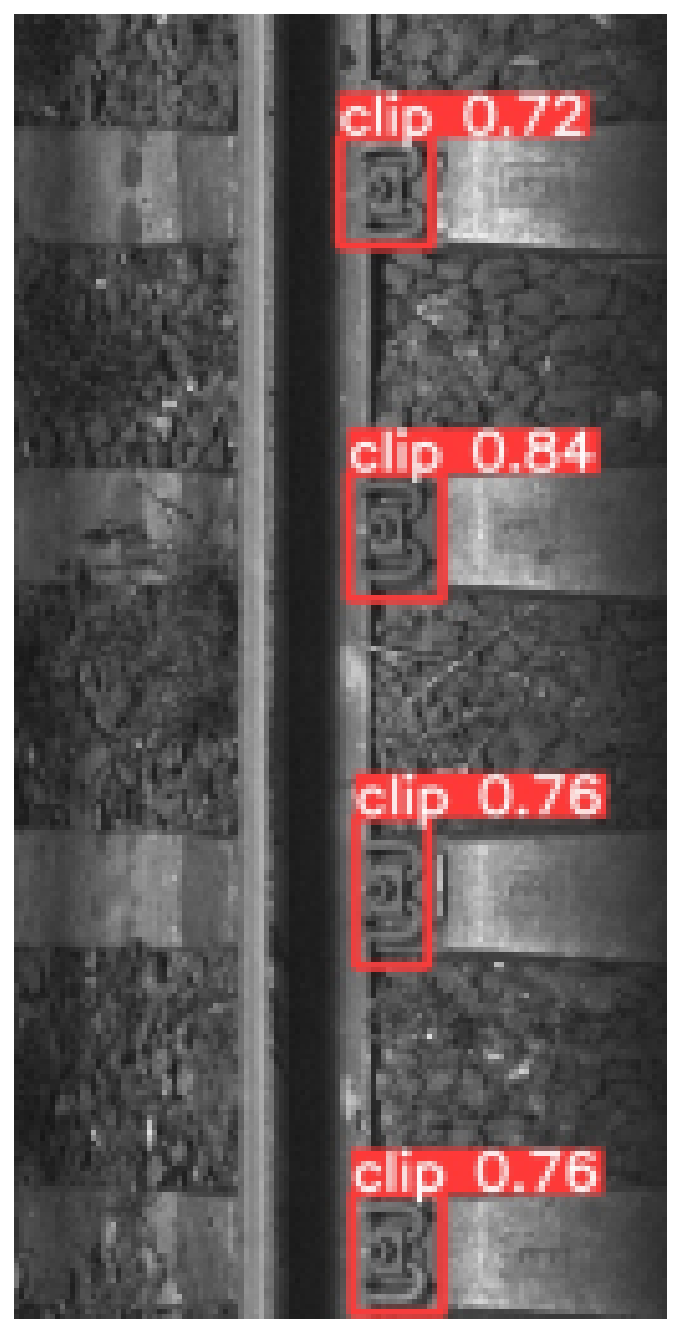

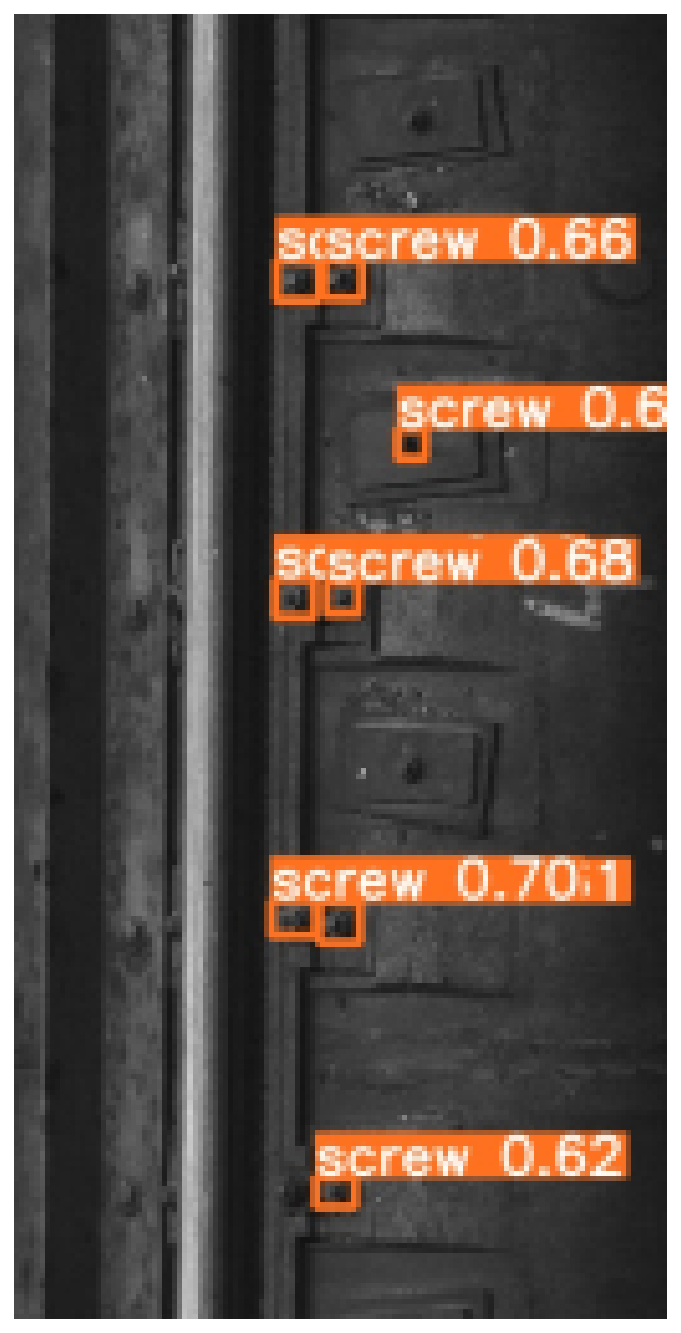

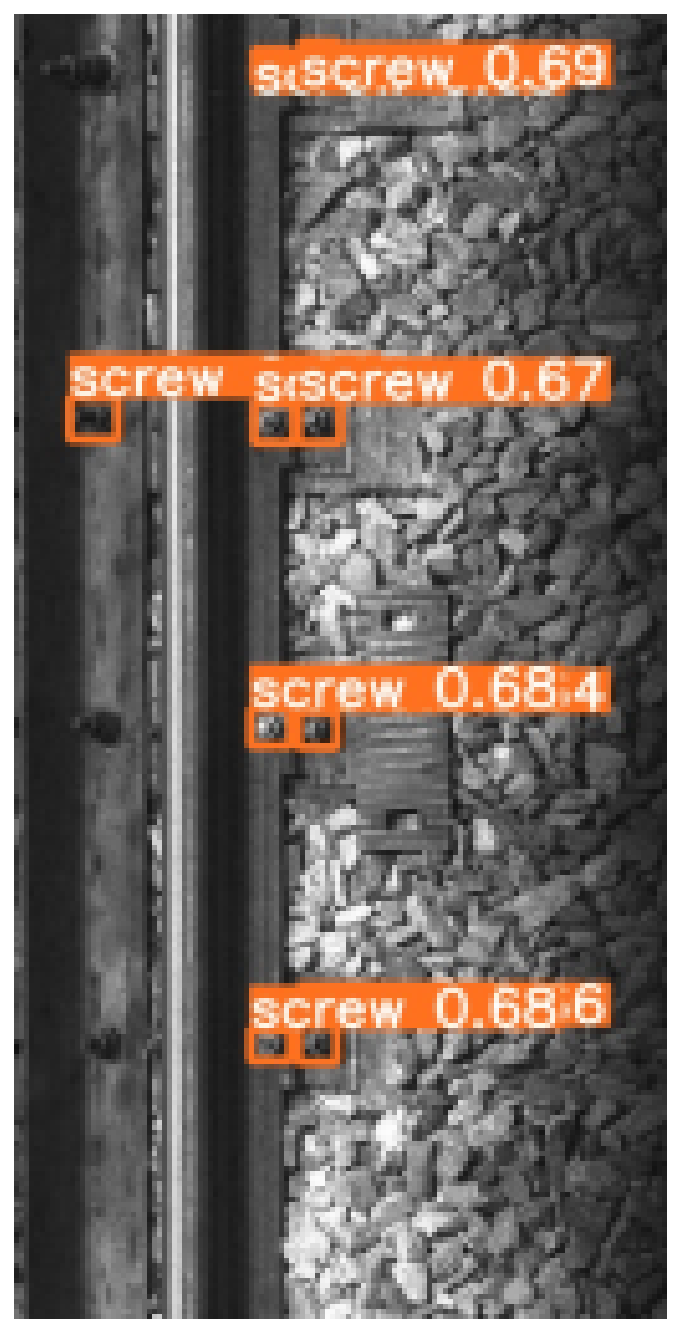

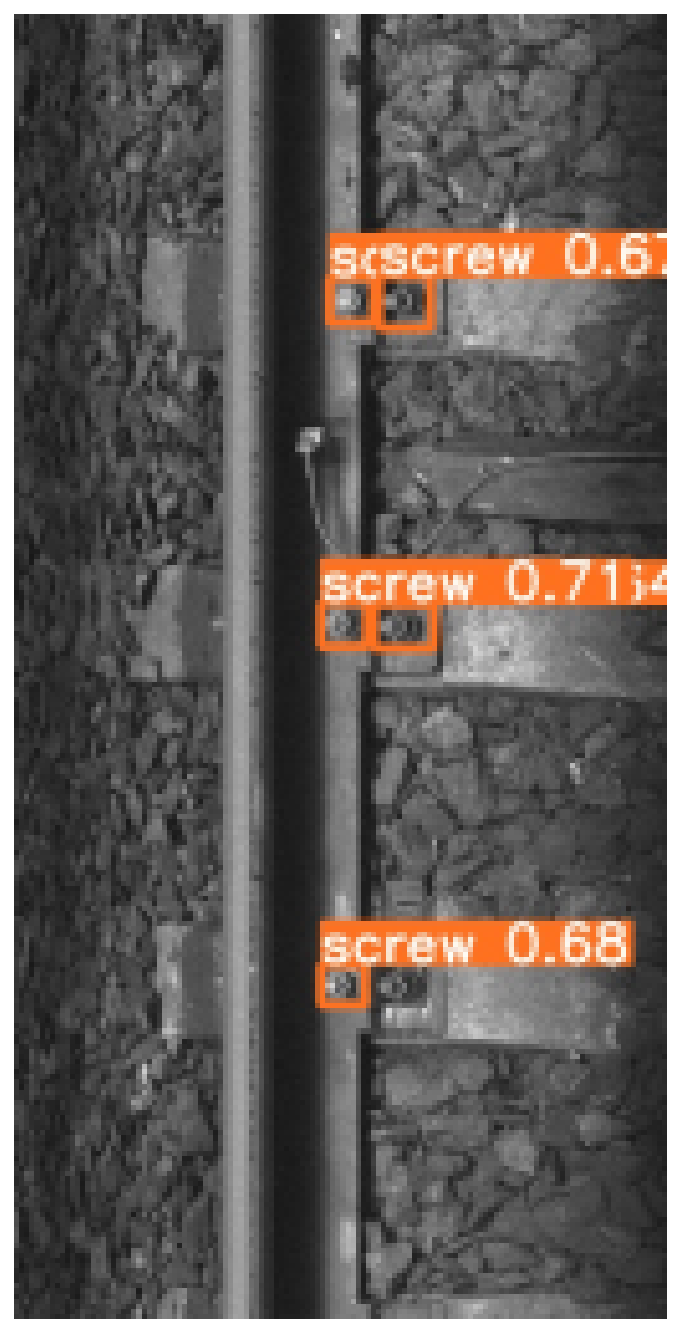

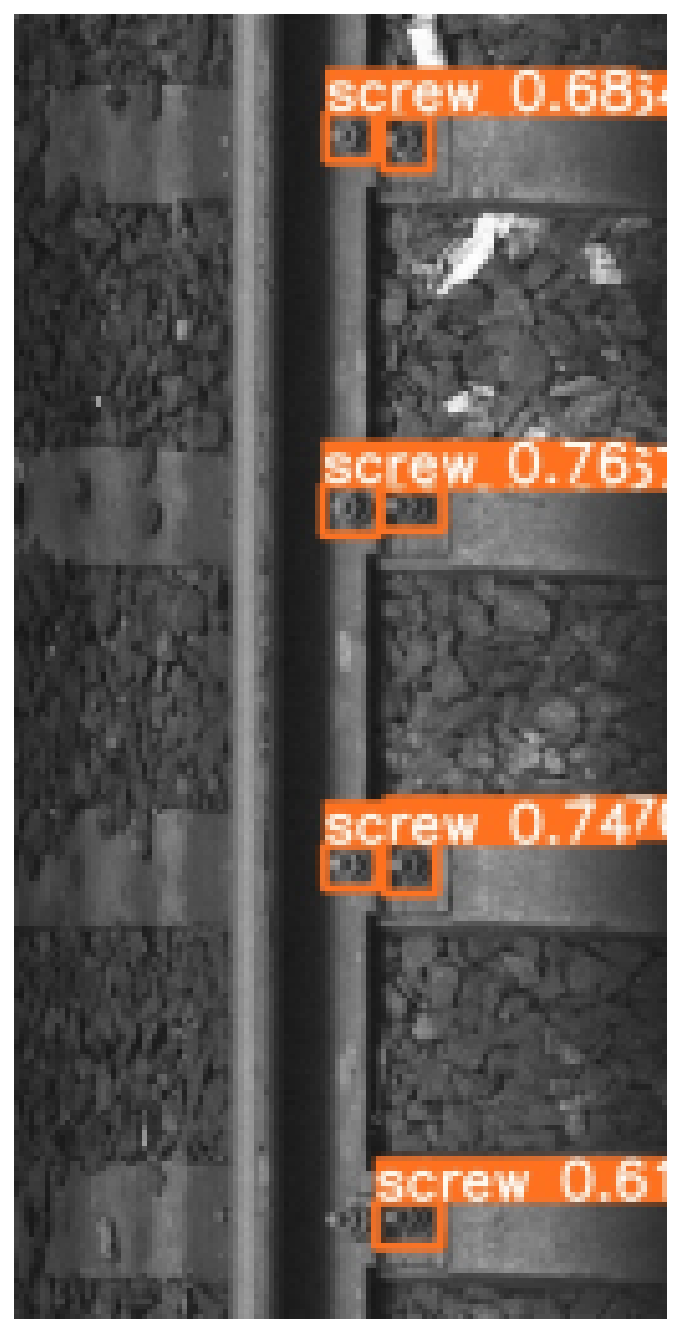

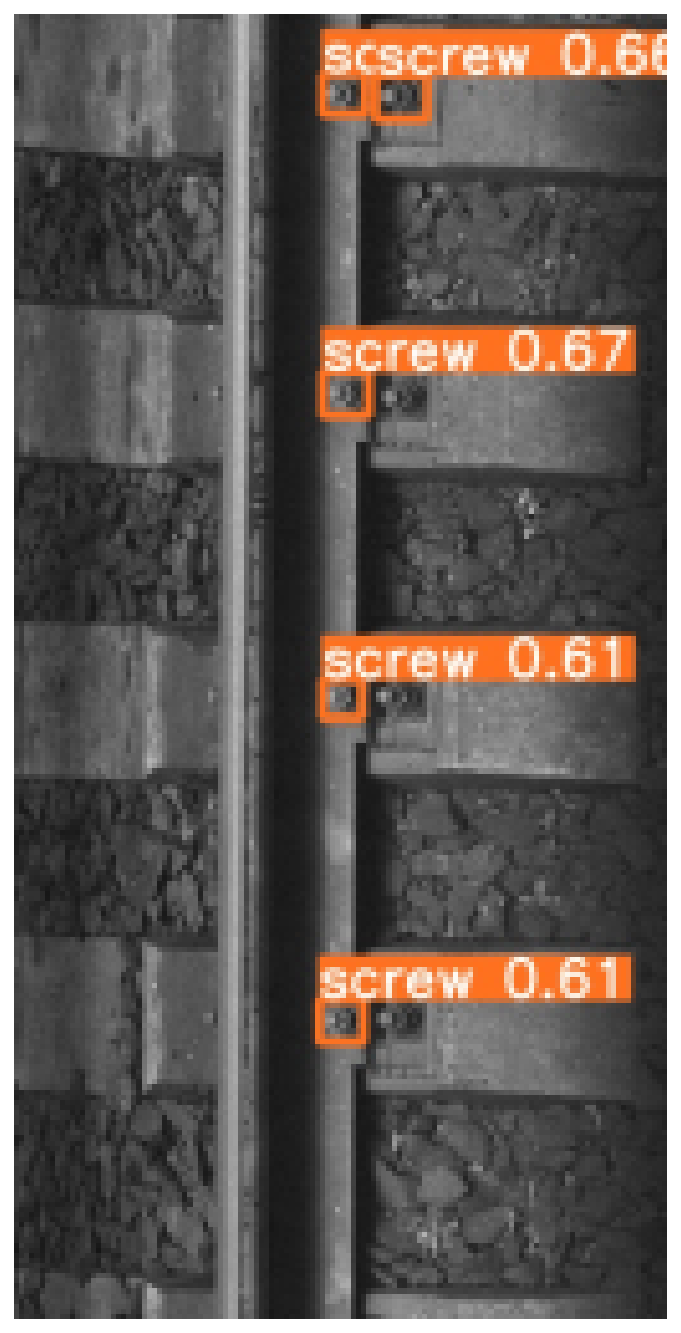

In [11]:
for i in range(68):
    img_paths = list(Path("yolov5/runs/detect/exp6").glob("*.jpeg"))[i:i+1]
    show_grid(img_paths)

## November images after scoring

In [13]:
for i in range(4):
    img_paths = list(Path("yolov5/runs/detect/exp9").glob("*.jpeg"))[i:i+1]
    show_grid(img_paths)

ZeroDivisionError: float division by zero